In [87]:
import pandas as pd
import numpy as np

In [88]:
adm16_21=pd.read_excel('Datasets/2016_21.xlsx')

In [89]:
adm21_22=pd.read_excel('Datasets/urg_altas_1.xlsx')

In [90]:
adm16_21=adm16_21.sort_values('DTA_ADMISSAO', ascending=False)

In [91]:
adm16_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 839494 to 853046
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   URG_EPISODIO         1048575 non-null  int64  
 1   NUM_SEQUENCIAL       1048575 non-null  int64  
 2   NUM_MECANOGRAFICO    1048575 non-null  int64  
 3   COD_LOCAL            1048575 non-null  int64  
 4   DTA_ADMISSAO         1048575 non-null  object 
 5   HORA_ADMISSAO        1048575 non-null  int64  
 6   COD_CAUSA            1048483 non-null  float64
 7   COD_PROVENIENCIA     1048013 non-null  float64
 8   COD_UNIDADE_PROV     108270 non-null   float64
 9   COD_SUBSISTEMA_RESP  1048575 non-null  int64  
 10  NUM_TAXA             1048575 non-null  int64  
 11  OBSERV               210743 non-null   object 
 12  NUM_AVISO            160 non-null      float64
 13  COD_PRIORIDADE       636291 non-null   float64
 14  COD_SALA             697160 non-null   float64

In [92]:
adm16_21['DTA_ADMISSAO']=pd.to_datetime(adm16_21['DTA_ADMISSAO'])

In [93]:
adm18_20=adm16_21[(adm16_21['DTA_ADMISSAO'].dt.year!=2021)&(adm16_21['DTA_ADMISSAO'].dt.year!=2017)&(adm16_21['DTA_ADMISSAO'].dt.year!=2016)]

In [94]:
adm21_22=adm21_22.sort_values('DTA_ADMISSAO', ascending=False)

In [95]:
adm18_20=adm18_20[['URG_EPISODIO','COD_LOCAL','DTA_ADMISSAO','COD_PRIORIDADE']]

In [96]:
adm21_22=adm21_22[['URG_EPISODIO','COD_LOCAL','DTA_ADMISSAO','COD_PRIORIDADE']]

In [97]:
adm18_20

,URG_EPISODIO,COD_LOCAL,DTA_ADMISSAO,COD_PRIORIDADE
584333,445787132916,1,2020-12-31,4.0
426089,445786582377,1,2020-12-31,3.0
260499,445785981789,4,2020-12-31,NaN
27828,445787066184,1,2020-12-31,2.0
11663,445786954964,1,2020-12-31,2.0
...,...,...,...,...
5737,100100085727,1,2018-01-01,3.0
1767,100098884551,1,2018-01-01,4.0
956587,100099918897,4,2018-01-01,NaN
559449,100098206109,1,2018-01-01,2.0


In [98]:
adm21_22

,URG_EPISODIO,COD_LOCAL,DTA_ADMISSAO,COD_PRIORIDADE
348688,22167457,9,2022-10-26,2.0
7909,22167125,1,2022-10-26,4.0
136257,22167310,9,2022-10-26,1.0
340411,22167467,1,2022-10-26,3.0
340351,22167452,4,2022-10-26,NaN
...,...,...,...,...
97164,21000163,1,2021-01-01,4.0
157460,21000005,1,2021-01-01,2.0
199806,21000161,1,2021-01-01,4.0
189606,21000240,1,2021-01-01,2.0


In [99]:
adm=[adm18_20,adm21_22]

In [100]:
adm=pd.concat(adm)

In [101]:
adm['DTA_ADMISSAO']=pd.to_datetime(adm['DTA_ADMISSAO'])

In [102]:
adm.sort_values('DTA_ADMISSAO', ascending=True)

,URG_EPISODIO,COD_LOCAL,DTA_ADMISSAO,COD_PRIORIDADE
332514,100100463875,1,2018-01-01,4.0
763842,100099879970,1,2018-01-01,3.0
755086,100099440651,1,2018-01-01,3.0
947583,100098712160,1,2018-01-01,3.0
956511,100099663091,1,2018-01-01,98.0
...,...,...,...,...
202074,22167393,3,2022-10-26,3.0
218560,22167465,3,2022-10-26,4.0
229218,22167121,9,2022-10-26,2.0
343643,22167436,1,2022-10-26,4.0


In [103]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880755 entries, 584333 to 170631
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   URG_EPISODIO    880755 non-null  int64         
 1   COD_LOCAL       880755 non-null  int64         
 2   DTA_ADMISSAO    880755 non-null  datetime64[ns]
 3   COD_PRIORIDADE  812755 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 33.6 MB


In [104]:
amarelos=adm[(adm['COD_PRIORIDADE']==3)&(adm['COD_LOCAL']==1)]

In [105]:
amarelos['URG_EPISODIO'].nunique()

267455

In [106]:
amarelos=amarelos[['URG_EPISODIO','DTA_ADMISSAO']]

In [107]:
amarelos["DTA_ADMISSAO"]=pd.to_datetime(amarelos["DTA_ADMISSAO"])

In [108]:
amarelos=amarelos.groupby('DTA_ADMISSAO')['URG_EPISODIO'].count().reset_index()

In [109]:
amarelos.sort_values('DTA_ADMISSAO', ascending=True)

,DTA_ADMISSAO,URG_EPISODIO
0,2018-01-01,136
1,2018-01-02,117
2,2018-01-03,176
3,2018-01-04,162
4,2018-01-05,133
...,...,...
1755,2022-10-22,162
1756,2022-10-23,171
1757,2022-10-24,203
1758,2022-10-25,166


In [110]:
amarelos=amarelos.sort_values("DTA_ADMISSAO")

In [111]:
amarelos["DTA_ADMISSAO"]=amarelos["DTA_ADMISSAO"].astype(str)

In [112]:
amarelos['Ano']=amarelos['DTA_ADMISSAO'].apply(lambda x: x.split('-')[0])

In [113]:
amarelos['Mes']=amarelos['DTA_ADMISSAO'].apply(lambda x: x.split('-')[1])

In [114]:
amarelos['Mes']=amarelos['Mes'].astype(int)

In [115]:
calendario=pd.read_csv('Datasets/calendario18_22final.csv')

In [116]:
calendario['data']=pd.to_datetime(calendario['data'])

In [117]:
calendario=calendario.drop('Unnamed: 0', axis=1)

In [118]:
amarelos['DTA_ADMISSAO']=pd.to_datetime(amarelos['DTA_ADMISSAO'])

In [119]:
amarelos=pd.merge(amarelos, calendario, left_on='DTA_ADMISSAO',right_on='data')

In [120]:
amarelos.columns

Index(['DTA_ADMISSAO', 'URG_EPISODIO', 'Ano', 'Mes', 'data', 'dia_semana',
       'feriado', 'festas', 'feriado - dia anterior',
       'feriado - 2 dias anteriores', 'feriado - dia seguinte',
       'feriado - daqui a 2 dias', 'festas - dia anterior',
       'festas - 2 dias anteriores', 'festas - dia seguinte',
       'festas - daqui a 2 dias'],
      dtype='object')

In [121]:
amarelos_adm=amarelos[['DTA_ADMISSAO','URG_EPISODIO','dia_semana','feriado','feriado - dia anterior',
       'feriado - 2 dias anteriores', 'feriado - dia seguinte','feriado - daqui a 2 dias','festas','festas - dia anterior',
       'festas - 2 dias anteriores', 'festas - dia seguinte','festas - daqui a 2 dias']]

In [122]:
amarelos_adm

,DTA_ADMISSAO,URG_EPISODIO,dia_semana,feriado,feriado - dia anterior,feriado - 2 dias anteriores,feriado - dia seguinte,feriado - daqui a 2 dias,festas,festas - dia anterior,festas - 2 dias anteriores,festas - dia seguinte,festas - daqui a 2 dias
0,2018-01-01,136,Monday,Ano Novo,n,n,NaN,NaN,NaN,n,n,NaN,NaN
1,2018-01-02,117,Tuesday,NaN,Ano Novo,n,NaN,NaN,NaN,NaN,n,NaN,NaN
2,2018-01-03,176,Wednesday,NaN,NaN,Ano Novo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,162,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,133,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,2022-10-22,162,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,2022-10-23,171,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,2022-10-24,203,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,2022-10-25,166,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
import plotly

<AxesSubplot:xlabel='DTA_ADMISSAO'>

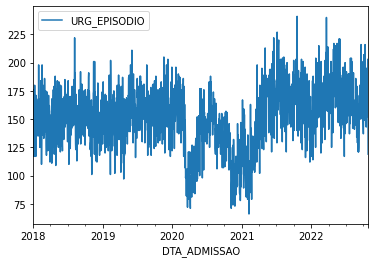

In [50]:
amarelos_adm.plot(kind='line', x='DTA_ADMISSAO', y='URG_EPISODIO')

In [201]:
ts=amarelos_adm['URG_EPISODIO']
exog=amarelos_adm[['dia_semana','feriado','festas']]

### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, exog, pdq, pdqs, maxiter=50, freq='M'):
   # '''
    #Input: 
     #   ts : your time series data
      #  pdq : ARIMA combinations from above
       # pdqs : seasonal ARIMA combinations from above
       # maxiter : number of iterations, increase if your model isn't converging
       # frequency : default='M' for month. Change to suit your time series frequency
        #    e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    #Return:
     #   Prints out top 5 parameter combinations
      #  Returns dataframe of parameter combinations ranked by BIC
    #'''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                exog=exog,
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}7 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts,exog, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =20176.924921368307
SARIMAX (0, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =18671.63561693026
SARIMAX (0, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =17753.052082119873
SARIMAX (0, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =15404.654115038411
SARIMAX (0, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =14894.34354426225
SARIMAX (0, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =14891.64433610213
SARIMAX (0, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =17091.642944917327


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



SARIMAX (0, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =15394.023690558852
SARIMAX (0, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =14900.251947209288
SARIMAX (0, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =15471.643633646945
SARIMAX (0, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =14982.989006619504


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =14980.931479238894
SARIMAX (0, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =15102.023153682407
SARIMAX (0, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =14891.13109923048


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =14869.480017855223
SARIMAX (0, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =16266.907020813745
SARIMAX (0, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =15097.417479149628
SARIMAX (0, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =14898.702840504096
SARIMAX (0, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =15182.64590096967


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =14980.554404277877


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =14985.92225861245
SARIMAX (0, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =14980.070591695088
SARIMAX (0, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =14897.962291272017


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =14884.943192544017
SARIMAX (0, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =15822.979798200915
SARIMAX (0, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =14979.333044961115


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =14906.254148346354
SARIMAX (0, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =19667.404385256345


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =18297.399250415416
SARIMAX (0, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =17549.663467605467
SARIMAX (0, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =15392.309653330734
SARIMAX (0, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =14810.34957854266
SARIMAX (0, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =14808.484803198004
SARIMAX (0, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =17088.23762683356
SARIMAX (0, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =15381.802185142044


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =14819.461280937929


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =15456.79802651859
SARIMAX (0, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =14898.70227135313
SARIMAX (0, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =14897.114037077505
SARIMAX (0, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =15073.764888586476
SARIMAX (0, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =14808.426708975772
SARIMAX (0, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =14815.480770023774
SARIMAX (0, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =16262.238450484712


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =15069.409515511303


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =14820.269714452925


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 0, 0, 7)7 : BIC Calculated =15153.076812237945


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 0, 1, 7)7 : BIC Calculated =14897.372321555862


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =14913.939167763512
SARIMAX (0, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =14925.384738597706
SARIMAX (0, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =14815.806926286205


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =14821.095379591015
SARIMAX (0, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =15797.562476268227
SARIMAX (0, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =14925.409003078717


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =15083.343614577469


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =18894.860169882286


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =18010.92989503644


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =17401.693739720147
SARIMAX (0, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =15390.13187344534
SARIMAX (0, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =14779.335142788115
SARIMAX (0, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =14775.535505570044
SARIMAX (0, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =17089.747812176047


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =15379.604077964475


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =14790.025032037256
SARIMAX (0, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =15453.992362751726
SARIMAX (0, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =14867.428434272288


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =14865.115632839232
SARIMAX (0, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =15065.915533121897
SARIMAX (0, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =14775.299000172647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =14773.079386117299
SARIMAX (0, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =16260.824849853692
SARIMAX (0, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =15062.251945863934


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =14791.23305812872


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =15144.667731672316


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =14864.272307888228


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 2, 7)7 : BIC Calculated =14885.840590522455
SARIMAX (0, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =14913.727966843433
SARIMAX (0, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =14782.533454356799


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =14788.982260171168
SARIMAX (0, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =15795.093233151545
SARIMAX (0, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =14913.876445869952


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =15075.557685903483
SARIMAX (0, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =15440.924397406257
SARIMAX (0, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =15429.404163527031
SARIMAX (0, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =15436.677715651123
SARIMAX (0, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =16357.823344948465
SARIMAX (0, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =15326.21913777699
SARIMAX (0, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =15329.030826200928
SARIMAX (0, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =18098.94160779948
SARIMAX (0, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =16343.177931242608
SARIMAX (0, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =15365.577867343993
SARIMAX (0, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =15428.805655937145
SARIMAX (0, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =15377.56819869509
SARIMAX (0, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =15380.293498709661
SARIMAX (0, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =15968.638655811312
SARIMAX (

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =15369.145476310321
SARIMAX (0, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =15435.468823254918
SARIMAX (0, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =15380.607958563332


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =15382.465001918194
SARIMAX (0, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =15721.442565103021
SARIMAX (0, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =15335.204141544775


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =15338.418439749976
SARIMAX (0, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =16704.432943474436
SARIMAX (0, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =15719.349464276938


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =15375.406923588367
SARIMAX (0, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =14607.233597404875
SARIMAX (0, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =14592.571977807247
SARIMAX (0, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =14598.184384114995
SARIMAX (0, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =15411.470758551655
SARIMAX (0, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =14471.615757979678
SARIMAX (0, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =14475.047916907259
SARIMAX (0, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =17097.426436910366
SARIMAX (0, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =15409.281257995384
SARIMAX (0, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =14517.030021340568
SARIMAX (0, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =14590.928617106421
SARIMAX (0, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =14520.28719425556


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =14523.590523530862
SARIMAX (0, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =15107.137306812741
SARIMAX (0, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =14475.23035369247
SARIMAX (0, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =14480.42767286153
SARIMAX (0, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =16274.099320908605
SARIMAX (0, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =15113.518763611715


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =14521.783909123194
SARIMAX (0, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =14595.907305521192


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =14523.84107032366


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =14529.011155015363
SARIMAX (0, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =14900.741967676659
SARIMAX (0, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =14481.883415766204
SARIMAX (0, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =14487.392670812114


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =15831.191604478658
SARIMAX (0, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =14902.325727785223


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =14535.723440433869
SARIMAX (0, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =14613.068976758675
SARIMAX (0, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =14597.059101574037
SARIMAX (0, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =14602.782317963673
SARIMAX (0, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =15398.9374756363
SARIMAX (0, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =14478.778022629704
SARIMAX (0, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =14481.88300517258
SARIMAX (0, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =17093.857920839346
SARIMAX (0, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =15396.827925014586


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =14524.678516117961
SARIMAX (0, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =14595.34134050782


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =14527.436038868027


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =14531.33253024338


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =15081.205838265634
SARIMAX (0, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =14482.086621961664


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =14487.34655578152
SARIMAX (0, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =16269.287395032927


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =15085.3048742616


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =14838.522449112384
SARIMAX (0, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =14600.460546535256


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =14532.229029373262


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =14536.159310696778
SARIMAX (0, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =14903.750802259106
SARIMAX (0, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =14488.73013474274


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =14494.229692472556


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =15805.576419565015


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =14905.458431535166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =14575.27687714367
SARIMAX (0, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =17224.417737987562
SARIMAX (0, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =17222.18713715706
SARIMAX (0, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =17229.256513071578
SARIMAX (0, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =18194.346407913108
SARIMAX (0, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =17148.88940236828
SARIMAX (0, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =17153.164215862547
SARIMAX (0, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =19929.816023929314
SARIMAX (0, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =18172.076744880396
SARIMAX (0, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =17180.09847868235
SARIMAX (0, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =17222.37731722036
SARIMAX (0, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =17203.220212523793


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =17232.139841262448
SARIMAX (0, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =17802.072521860093
SARIMAX (0, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =17153.409036974397
SARIMAX (0, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =17153.549338013483
SARIMAX (0, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =19100.55637808616
SARIMAX (0, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =17786.611518142712
SARIMAX (0, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =17184.754112304512
SARIMAX (0, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =17229.779391604294
SARIMAX (0, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =17232.10380727382
SARIMAX (0, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =17207.957631528247
SARIMAX (0, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =17534.774342590532
SARIMAX (0, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =17158.588900869585
SARIMAX (0, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =17160.06698581988
SARIMAX (0, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =18518.223498163483
SARIMAX (

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =17190.52406189194


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



SARIMAX (0, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =15447.756061505608
SARIMAX (0, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =15436.039963615658


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =15443.295182412674
SARIMAX (0, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =16364.101931499865
SARIMAX (0, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =15340.835488281991
SARIMAX (0, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =15343.768073332609
SARIMAX (0, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =18104.132875217038
SARIMAX (0, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =16357.850293517164
SARIMAX (0, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =15407.951054736937
SARIMAX (0, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =15435.413640189005
SARIMAX (0, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =15382.771644556204
SARIMAX (0, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =15387.332479730843
SARIMAX (0, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =15975.855679655047
SARIMAX (0, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =15345.609255557007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =15345.878926656953
SARIMAX (0, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =17268.77750845048
SARIMAX (0, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =15976.955527450938


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =14372.083378116975


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =15442.045190832765
SARIMAX (0, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =15386.472792434719
SARIMAX (0, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =15387.892619042419


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =15729.44383233147


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =15350.64801439072


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =15355.032749913185
SARIMAX (0, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =16712.276687178837
SARIMAX (0, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =15735.713073822142
SARIMAX (0, 2, 1) x (2, 2, 2, 7)7 : BIC Calculated =15418.643128527312
SARIMAX (0, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =14618.186135835502
SARIMAX (0, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =14603.43604088827


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =14609.666846690716
SARIMAX (0, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =15431.567392925532
SARIMAX (0, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =14493.127592074434
SARIMAX (0, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =14496.78779886713
SARIMAX (0, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =17112.649434179246
SARIMAX (0, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =15454.208755639074
SARIMAX (0, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =14583.335657353127


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =14601.766317033853
SARIMAX (0, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =14542.601741011336
SARIMAX (0, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =14545.900176755149


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =15119.059623278208
SARIMAX (0, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =14496.517227236862
SARIMAX (0, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =14500.406781018695
SARIMAX (0, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =16291.389094482467


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =15127.810400205337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =14685.44298199328


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =14606.938128182876
SARIMAX (0, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =14548.501227762326
SARIMAX (0, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =14557.019472778684


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =14912.813369431378
SARIMAX (0, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =14505.6181012823
SARIMAX (0, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =14510.01561101969


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =15850.456397415663


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =14927.449679299169
SARIMAX (0, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =14616.109228122285
SARIMAX (1, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =15454.007195467519


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =15440.963126903445


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =15450.90350484936
SARIMAX (1, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =15389.167814640958
SARIMAX (1, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =14770.018151365442
SARIMAX (1, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =14768.012151572848
SARIMAX (1, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =17086.93898389614
SARIMAX (1, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =15378.682263879642
SARIMAX (1, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =14781.938532190052
SARIMAX (1, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =15453.090167705184
SARIMAX (1, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =14857.825494544515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =14856.176202634428
SARIMAX (1, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =15066.20632195754
SARIMAX (1, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =14768.040182932149
SARIMAX (1, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =14774.452374343606
SARIMAX (1, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =16260.394223125473


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =15061.91026166761


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =14781.613981329338


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =15144.864644559299


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =14857.35103888223


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =14881.732493557089
SARIMAX (1, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =14909.654324401889
SARIMAX (1, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =14775.465177078293


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =14780.59026485739
SARIMAX (1, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =15792.069627042521
SARIMAX (1, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =14909.883287247028


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =14807.790087028805
SARIMAX (1, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =14627.553491987797
SARIMAX (1, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =14612.909463083432


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =14622.746375546349
SARIMAX (1, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =15382.392351996321
SARIMAX (1, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =14472.080734897461
SARIMAX (1, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =14475.31367957219
SARIMAX (1, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =17089.042909967135
SARIMAX (1, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =15371.845503199202


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =14511.57311482668


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =15481.87783813626


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =14539.21757496115


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =14641.8009925493
SARIMAX (1, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =15031.180467985565
SARIMAX (1, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =14475.47759692144
SARIMAX (1, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =14480.862649984756
SARIMAX (1, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =16255.92627796685


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =15026.9391643635


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =14516.314597378212


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 0, 0, 7)7 : BIC Calculated =15107.227301089371


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 0, 1, 7)7 : BIC Calculated =14579.579151598247


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =14560.227102239778
SARIMAX (1, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =14842.914895002297


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =14482.345169606007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =14487.867777525673
SARIMAX (1, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =15776.23231239935
SARIMAX (1, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =14843.32626405215


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =14763.912322995388


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =14633.788727844192
SARIMAX (1, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =14617.399694250566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =14623.348191932599
SARIMAX (1, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =15387.025964460781
SARIMAX (1, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =14479.419057592744
SARIMAX (1, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =14482.455564550946
SARIMAX (1, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =17094.400585443764
SARIMAX (1, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =15376.54933858277


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =14518.960834187641


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =15443.611990331325


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =14651.449355621675


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =14586.407169822725
SARIMAX (1, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =15037.173715728753
SARIMAX (1, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =14482.637673474444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =14488.229328749068
SARIMAX (1, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =16260.366704072558


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =15033.537880842483


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =14531.523740137427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =15166.767009801932


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =15391.527919035632
SARIMAX (1, 0, 2) x (2, 0, 2, 7)7 : BIC Calculated =14597.918845292392
SARIMAX (1, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =14850.291367380898
SARIMAX (1, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =14489.48987775266


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =14495.039299904547


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =15772.078951981059
SARIMAX (1, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =14850.66414879911


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =14858.240035934534
SARIMAX (1, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =15074.204905340079
SARIMAX (1, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =15047.333135314115
SARIMAX (1, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =15051.776565631486
SARIMAX (1, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =15909.199962986384
SARIMAX (1, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =14903.61316833456
SARIMAX (1, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =14903.242622103633
SARIMAX (1, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =17646.29565301913
SARIMAX (1, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =15896.80495024288


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =14945.619158671812
SARIMAX (1, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =15044.034521542304
SARIMAX (1, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =14956.443568569795


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =14956.83159563233
SARIMAX (1, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =15526.515770469983
SARIMAX (1, 1, 0) x (1, 1, 1, 7)7 : BIC Calculated =14903.607814222836
SARIMAX (1, 1, 0) x (1, 1, 2, 7)7 : BIC Calculated =14908.557533446552
SARIMAX (1, 1, 0) x (1, 2, 0, 7)7 : BIC Calculated =16794.92433686561
SARIMAX (1, 1, 0) x (1, 2, 1, 7)7 : BIC Calculated =15520.611482498061


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =14957.422807753854
SARIMAX (1, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =15046.946112772499


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =14956.627755841362


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =14963.10134329644
SARIMAX (1, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =15312.917145132167
SARIMAX (1, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =14910.342985063018


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =14915.817413268112
SARIMAX (1, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =16283.635242633896
SARIMAX (1, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =15312.041944475373


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =14969.614715278405
SARIMAX (1, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =14613.283085471308
SARIMAX (1, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =14597.250121166684
SARIMAX (1, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =14602.948022089371
SARIMAX (1, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =15395.741255732422
SARIMAX (1, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =14478.794962941316


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =14481.90483574292
SARIMAX (1, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =17092.52761137007
SARIMAX (1, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =15393.641503215691


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =14524.399787302287
SARIMAX (1, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =14595.512579351429
SARIMAX (1, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =14527.400845026857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =14531.121467516936


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =15073.56060654929
SARIMAX (1, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =14482.117659215652
SARIMAX (1, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =14487.351814942642


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =16267.406359385066
SARIMAX (1, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =15077.757128182604


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =14556.337613465023
SARIMAX (1, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =14600.606638150703


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =14531.529383816394


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =14535.940066055606


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =14903.525415951028
SARIMAX (1, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =14488.752641448262


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =14494.293557454652


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =15800.009588857318


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =14905.261850129964


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =1027.6207583918538


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



SARIMAX (1, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =14617.20925430268
SARIMAX (1, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =14602.97444716879
SARIMAX (1, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =14608.86211718705
SARIMAX (1, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =15424.121662423298
SARIMAX (1, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =14485.123056234066


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =14488.638778659662
SARIMAX (1, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =17101.759687221584
SARIMAX (1, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =15421.981177340132
SARIMAX (1, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =14523.694242697973
SARIMAX (1, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =14601.434284505985


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =14533.74823558805


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =14539.195100274603


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =15037.961005652704


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =14488.821032681075


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =14493.798735244995


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =16275.186362901224
SARIMAX (1, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =15115.935145747895


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =14536.942052302436
SARIMAX (1, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =14606.68983894078


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =14538.378299949047


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =14545.062483532633


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =14911.162807429662


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =14495.445784601598


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =14501.612104202504


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =15840.576104030077


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =14913.030145890642


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =14560.970082761836
SARIMAX (1, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =16384.38143316632
SARIMAX (1, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =16359.956600589469
SARIMAX (1, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =16365.81206303189
SARIMAX (1, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =17227.18157765329
SARIMAX (1, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =16239.513704111663
SARIMAX (1, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =16236.655694107545
SARIMAX (1, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =18953.20231761504
SARIMAX (1, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =17209.09201980273


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =16276.592089196796
SARIMAX (1, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =16357.729736971296
SARIMAX (1, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =16296.224750121219


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =16293.536825426176
SARIMAX (1, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =16854.888118229766
SARIMAX (1, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =16237.090125798539


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =16242.416148546943
SARIMAX (1, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =18111.441815974817
SARIMAX (1, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =16843.375804725616


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =16275.612759885827
SARIMAX (1, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =16362.7830154993


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =16293.856019605222


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =16299.564531452306
SARIMAX (1, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =16643.393943080166
SARIMAX (1, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =16243.87307970533


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =16251.149792779324
SARIMAX (1, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =17601.02102953028
SARIMAX (1, 2, 0) x (2, 2, 1, 7)7 : BIC Calculated =16636.947918531085


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =16294.416699061852


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =15081.986909780495


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =15054.917553450203


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =15060.23688375492
SARIMAX (1, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =15916.543858651065
SARIMAX (1, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =14920.713907191028


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =14919.62078533568
SARIMAX (1, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =17652.4805065515
SARIMAX (1, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =15912.180736006705
SARIMAX (1, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =14993.757912956762


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =15051.538084051512
SARIMAX (1, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =14966.782169649236


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =14966.361330449861


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =15534.775419919362
SARIMAX (1, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =14919.915840939188


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =14924.66000597469


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =16802.58770308032
SARIMAX (1, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =15537.316508120995
SARIMAX (1, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =14999.665008492002


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =15055.535424325108
SARIMAX (1, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =14966.892991005763


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =14970.694165591241


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =15321.893861089387


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =14926.894985198931


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =14934.285379211347
SARIMAX (1, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =16293.054690173885


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =15329.665993115914


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =14624.340522371276


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =14608.281616591494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =14619.270206100518
SARIMAX (1, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =15414.731141285029
SARIMAX (1, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =14504.19644728831


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =14502.266686770781
SARIMAX (1, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =17107.479324586817
SARIMAX (1, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =15436.781307312342


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =14595.838355746806


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =14607.302519955161


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =14550.177858023795
SARIMAX (1, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =14553.471177781705


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =15094.631452468959
SARIMAX (1, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =14502.871572632588
SARIMAX (1, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =14513.882824089722
SARIMAX (1, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =16284.487253735573
SARIMAX (1, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =15126.33112160508
SARIMAX (1, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =14956.456725039861


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =14613.417860765687
SARIMAX (1, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =14552.706227524888


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =14563.850479545583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =14918.008427950967


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =14511.64776207055
SARIMAX (1, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =14517.233648972091


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =15818.603407100569
SARIMAX (1, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =14931.57775401908


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =14669.496490485653
SARIMAX (2, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =15091.62718191031


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =15066.477280458863


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =15069.665856387714
SARIMAX (2, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =15385.806941211444
SARIMAX (2, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =14700.492204040418
SARIMAX (2, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =14696.054369755258
SARIMAX (2, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =17088.496610009304
SARIMAX (2, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =15375.356476544215


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =14718.269005817121


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =15448.791810836192


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =14787.461017325886


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =14784.58026293403
SARIMAX (2, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =15053.704647018736
SARIMAX (2, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =14695.877637301202
SARIMAX (2, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =14703.458500304905
SARIMAX (2, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =16257.975862510686


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =15049.54084506638


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =14722.369196095719


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =15156.925519050974


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =14784.11141064818


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =14827.57919256362
SARIMAX (2, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =14889.438629860337
SARIMAX (2, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =14703.181907717868


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =14709.370563219549
SARIMAX (2, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =15787.218167681998
SARIMAX (2, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =14889.900740903857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =14748.181700787454
SARIMAX (2, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =15464.6767569619


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =15462.605712757193
SARIMAX (2, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =15465.43509903037
SARIMAX (2, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =15393.532451034696
SARIMAX (2, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =14479.42663838708
SARIMAX (2, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =14482.47396181638
SARIMAX (2, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =17094.726311355473
SARIMAX (2, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =15377.108917996384


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =14519.243104779045


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =15465.535430547463


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =14869.921911673453


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =14870.898928070494
SARIMAX (2, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =15037.401726829883
SARIMAX (2, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =14482.647507024081


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =14488.185910300892
SARIMAX (2, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =16260.792783565616


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =15033.774860734251


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =14536.676850967087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =14891.265463537127
SARIMAX (2, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =14850.300961457186


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =14489.504364691558


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =14495.03572902404
SARIMAX (2, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =15782.826185052269
SARIMAX (2, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =14850.684746826599


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =14809.050175384233


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =14631.57276368116


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =14626.166874463897


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =14637.364849518404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =15158.56613727793


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =14485.782676258463


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =14489.158045814092


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =16864.034550323984


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =15163.29376185812


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =14534.179761321948
SARIMAX (2, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =15401.975196072008


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =14560.488653422508


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =14623.211450778941


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =15036.041393741161
SARIMAX (2, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =14489.324152048823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =14494.76719858946


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =16139.089447517668


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =15032.854410701402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =14535.985171193572


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =15201.128984208559
SARIMAX (2, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =14586.925366845164


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =14856.234749037054


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =14497.926007991875


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =14504.526322350031


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =15702.502596002607


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =14853.258579233398


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =14608.441709666293
SARIMAX (2, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =14843.8578380269
SARIMAX (2, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =14828.80828072408
SARIMAX (2, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =14834.667434858506
SARIMAX (2, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =15733.415811205396
SARIMAX (2, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =14696.05484747427
SARIMAX (2, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =14698.596525102008
SARIMAX (2, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =17480.28723427197
SARIMAX (2, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =15721.511092483957
SARIMAX (2, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =14736.94723979926
SARIMAX (2, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =14827.122198968798


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =14746.08961271154


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =14751.746167039135
SARIMAX (2, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =15335.193744423954
SARIMAX (2, 1, 0) x (1, 1, 1, 7)7 : BIC Calculated =14699.213406619485


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 1, 2, 7)7 : BIC Calculated =14701.597617601452
SARIMAX (2, 1, 0) x (1, 2, 0, 7)7 : BIC Calculated =16622.11308902572
SARIMAX (2, 1, 0) x (1, 2, 1, 7)7 : BIC Calculated =15330.212600530047


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =14754.395803366044
SARIMAX (2, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =14831.507113437436


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =14751.579623740501


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =14753.028509318641
SARIMAX (2, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =15104.702978662965
SARIMAX (2, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =14705.820351672535


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =14708.896916639593
SARIMAX (2, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =16093.359813772726
SARIMAX (2, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =15104.975645017184


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =14761.829975055096
SARIMAX (2, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =14615.684529807062
SARIMAX (2, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =14603.58087952488
SARIMAX (2, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =14609.497709270196
SARIMAX (2, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =15392.222213009001
SARIMAX (2, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =14485.203963067843


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =14489.017191793264


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =17093.96950806338
SARIMAX (2, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =15390.16582843298


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =14533.892860897247
SARIMAX (2, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =14602.116420753102


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =14534.750223704745


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =14540.187133473184


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =15060.855706408105
SARIMAX (2, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =14489.193397043524
SARIMAX (2, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =14494.20345708921


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =16264.846570708236
SARIMAX (2, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =15065.195860587775


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =14557.506885955248
SARIMAX (2, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =14607.394585614404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =14541.256607298119


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =14545.930044832134


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =14897.18977943154
SARIMAX (2, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =14495.822063118203


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =14503.659559288139


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =15796.60538499144


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =14907.09998252431


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =14570.368410018968
SARIMAX (2, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =14622.176096202396
SARIMAX (2, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =14609.978605607736
SARIMAX (2, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =14615.954243783552


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =15390.764522297512


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =14491.947019182566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =14496.013330625416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =17075.393591309108


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =15389.040312850791


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =14532.513000426941
SARIMAX (2, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =14608.562646356666


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =14541.969417753204


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =14546.450338915329


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =15081.859060071989


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =14490.86769738822


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =14500.922054025563


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =16271.39210007752


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =15083.958443915


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =14815.08933264418


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =14613.892187668358


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =14548.861283490223


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =14552.899684712851


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =14918.251112866388


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =14497.746491948583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =14510.12629819805
SARIMAX (2, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =15814.8802614084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =14919.511568022263


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =14571.38109436025
SARIMAX (2, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =15894.915105048565
SARIMAX (2, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =15873.212829620665
SARIMAX (2, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =15879.082386967408
SARIMAX (2, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =16746.754060173735
SARIMAX (2, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =15729.238504392633
SARIMAX (2, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =15729.894831122334
SARIMAX (2, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =18481.003523590593
SARIMAX (2, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =16730.719800625393


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =15767.011736286853
SARIMAX (2, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =15870.925308215752


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =15784.773654489954


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =15788.12640112298
SARIMAX (2, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =16360.544277776808
SARIMAX (2, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =15730.4152156399
SARIMAX (2, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =15730.252285010956
SARIMAX (2, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =17640.487035707298
SARIMAX (2, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =16351.354185494227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =15770.638011753215
SARIMAX (2, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =15874.766916537557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =15787.448484096507


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =15787.306866494626
SARIMAX (2, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =16122.266329683245
SARIMAX (2, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =15737.005689679125


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =15743.812527020522
SARIMAX (2, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =17094.930478597555
SARIMAX (2, 2, 0) x (2, 2, 1, 7)7 : BIC Calculated =16118.526244418039


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =15781.302773988096


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =14852.424209732511


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =14839.028838819277


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =14844.24368871523


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =15741.367992942745
SARIMAX (2, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =14711.449487640599


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =14715.893284799062


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =17486.664947191894
SARIMAX (2, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =15738.000755197361
SARIMAX (2, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =14794.250282287481


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =14837.175783004232


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =14755.336444608498


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =14758.983759788098


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =15344.172521487732


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =14716.368879143016


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =14718.391167066346
SARIMAX (2, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =16630.626071819894
SARIMAX (2, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =15347.721825755414
SARIMAX (2, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =74.31299675155903


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =14841.445540920902


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =14761.119794981027


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =14761.510020518946


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =15114.787564274437
SARIMAX (2, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =14723.418117888234


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =14731.748625467077
SARIMAX (2, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =16102.940588324882
SARIMAX (2, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =15123.33841021462


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =14632.818112159379


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =14667.238667300237


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =14846.116870328115


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =15411.041823357848
SARIMAX (2, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =14506.121200584204


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =14510.350806597222


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =17108.56784969801


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =15488.478751157743
SARIMAX (2, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =14622.388814314894


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =14655.912970145517


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =14963.812989493406


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =14966.992606237824


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =15087.822596425089


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =14512.793261570709


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =14516.067858019394


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =16281.841841749034


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =15122.540642656979


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =14621.18343603219
SARIMAX (2, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =14819.829854861731


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =14967.004875668752


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =14736.526702001174


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =14924.860381073346


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =14528.208480563404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =14537.335296824298


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =15818.025456084648


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =14945.02804577987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =14655.184625322428


,pdq,pdqs,bic
688,"(2, 2, 1)","(1, 2, 2, 7)",74.312997
377,"(1, 1, 1)","(2, 2, 2, 7)",1027.620758
206,"(0, 2, 1)","(1, 2, 2, 7)",14372.083378
112,"(0, 1, 1)","(0, 1, 1, 7)",14471.615758
274,"(1, 0, 1)","(0, 1, 1, 7)",14472.080735


In [202]:
ts=amarelos_adm['URG_EPISODIO']
exog=amarelos_adm[['dia_semana','feriado','festas']]

### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, exog, pdq, pdqs, maxiter=50, freq='M'):
   # '''
    #Input: 
     #   ts : your time series data
      #  pdq : ARIMA combinations from above
       # pdqs : seasonal ARIMA combinations from above
       # maxiter : number of iterations, increase if your model isn't converging
       # frequency : default='M' for month. Change to suit your time series frequency
        #    e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    #Return:
     #   Prints out top 5 parameter combinations
      #  Returns dataframe of parameter combinations ranked by BIC
    #'''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                exog=exog,
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}30 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts,exog, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =20176.924921368307
SARIMAX (0, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =19974.153040765064
SARIMAX (0, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =19220.91071811867
SARIMAX (0, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =15823.168008277476
SARIMAX (0, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =15432.110760009513
SARIMAX (0, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =15391.910705297496
SARIMAX (0, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =17190.4945776425


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



SARIMAX (0, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =15697.251034208555
SARIMAX (0, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =15366.264686623821
SARIMAX (0, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =16214.16745114771
SARIMAX (0, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =15833.790544157162


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =15802.204012613522
SARIMAX (0, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =15585.741082203
SARIMAX (0, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =15377.024857887127
SARIMAX (0, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =15355.088433545674
SARIMAX (0, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =16446.811123717667
SARIMAX (0, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =15482.455749150526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =15334.711366681902
SARIMAX (0, 0, 0) x (2, 0, 0, 30)30 : BIC Calculated =15982.530971763472


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 0, 1, 30)30 : BIC Calculated =15779.797689428773
SARIMAX (0, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =15506.996540564045


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =15361.804294105652


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =15362.004723091695
SARIMAX (0, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =16049.992958126662
SARIMAX (0, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =15416.722758394575


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =15337.91489887246
SARIMAX (0, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =19667.404385256345
SARIMAX (0, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =18907.40647169807


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =18278.22451235055
SARIMAX (0, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =15696.999562640813
SARIMAX (0, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =15169.75194895418
SARIMAX (0, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =15140.05999554984
SARIMAX (0, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =17101.636362871795
SARIMAX (0, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =15573.476158812355
SARIMAX (0, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =15128.770573588994
SARIMAX (0, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =16069.342299309988
SARIMAX (0, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =18030.869694826026


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =15534.046965241738
SARIMAX (0, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =15407.87178466729


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =15131.744638640477


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =15115.61512213497
SARIMAX (0, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =16317.038162486493
SARIMAX (0, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =15309.550848112449


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =15108.37298198714


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 0, 0, 30)30 : BIC Calculated =15798.43305861402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 0, 2, 30)30 : BIC Calculated =15784.751076854607
SARIMAX (0, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =15304.5389407825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =15122.860354374128
SARIMAX (0, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =15151.585612676145
SARIMAX (0, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =15899.610155149963
SARIMAX (0, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =15221.157565664029


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =15113.43751292474


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =18894.860169882286
SARIMAX (0, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =18255.311733834278


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =17772.211523431743
SARIMAX (0, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =15681.598423916586
SARIMAX (0, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =15086.167527358977


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =15064.65016694954
SARIMAX (0, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =17097.04075211461
SARIMAX (0, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =15558.458925090126
SARIMAX (0, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =15057.83472111493


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =16069.034507153241


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =15461.599410248027


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =15439.894414393608
SARIMAX (0, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =15364.664643780625
SARIMAX (0, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =15060.549736751347


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =15044.800138922606
SARIMAX (0, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =16292.034462611333
SARIMAX (0, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =15268.205151219507
SARIMAX (0, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =15045.247007800743


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =15788.747191947432


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =15436.13248691266


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 2, 30)30 : BIC Calculated =15524.162383862347
SARIMAX (0, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =15254.676025021758


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =15049.57721819562


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =15074.13491982905
SARIMAX (0, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =15868.727742217792
SARIMAX (0, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =15173.619634076374


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =15049.8518926213
SARIMAX (0, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =15440.924397406257
SARIMAX (0, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =15448.360863781092
SARIMAX (0, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =15452.20560846582
SARIMAX (0, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =16327.438122616719
SARIMAX (0, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =15305.576141627416
SARIMAX (0, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =15312.948772302507
SARIMAX (0, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =17800.900196409177
SARIMAX (0, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =16192.235698459588
SARIMAX (0, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =15332.977373586675
SARIMAX (0, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =15448.361185270109
SARIMAX (0, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =15455.802984502627
SARIMAX (0, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =15445.507974145174
SARIMAX (0, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =15338.602797141062
SARIMAX (0, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =15452.9233116099
SARIMAX (0, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =15445.188892115993
SARIMAX (0, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =15447.014299866234
SARIMAX (0, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =15733.456490357714
SARIMAX (0, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =15318.114962977603


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =15318.22902420431
SARIMAX (0, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =16440.254616372265
SARIMAX (0, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =15648.277586539445


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =15346.189821504771
SARIMAX (0, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =14607.233597404875
SARIMAX (0, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =14614.632977697596
SARIMAX (0, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =14618.438549406588
SARIMAX (0, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =15519.26431145084
SARIMAX (0, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =14489.596922107094


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =14497.01763220852
SARIMAX (0, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =17009.55221522681
SARIMAX (0, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =15398.654619526633
SARIMAX (0, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =14527.682856658008
SARIMAX (0, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =14614.636276540457
SARIMAX (0, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =14612.733636376475
SARIMAX (0, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =14617.198460175558
SARIMAX (0, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =15087.368899491894
SARIMAX (0, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =14497.14530119147


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =14496.302104193011
SARIMAX (0, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =16121.47106650908
SARIMAX (0, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =14997.930657229146
SARIMAX (0, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =14534.144669659878
SARIMAX (0, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =14619.086279831661
SARIMAX (0, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =14617.109763207302
SARIMAX (0, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =14616.533404563177
SARIMAX (0, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =14908.643971796782


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =14502.365117055402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =14500.990060065838
SARIMAX (0, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =15648.088347494657
SARIMAX (0, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =14838.947001782923


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =14541.318019897726
SARIMAX (0, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =14613.068976758675
SARIMAX (0, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =14620.468285978595
SARIMAX (0, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =14624.074148831449
SARIMAX (0, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =15525.127413936903


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =14495.40908471925


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =14502.838520056777
SARIMAX (0, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =17015.137617741704
SARIMAX (0, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =15404.5991042583
SARIMAX (0, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =14533.66420840962
SARIMAX (0, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =14620.471667591624
SARIMAX (0, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =14618.185356219406
SARIMAX (0, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =14622.494986180038
SARIMAX (0, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =15093.998628613452
SARIMAX (0, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =14502.869393656543
SARIMAX (0, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =14502.154205870778
SARIMAX (0, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =16127.934792611399
SARIMAX (0, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =15004.475778638756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =14540.140228422648
SARIMAX (0, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =14624.76972774166
SARIMAX (0, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =14622.402159304655
SARIMAX (0, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =14621.896867995267
SARIMAX (0, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =14915.02887114244


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =14508.06434177489


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =14508.145321365077
SARIMAX (0, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =15654.004132549266
SARIMAX (0, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =14845.232441896354


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =14547.92705197821
SARIMAX (0, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =17224.417737987562
SARIMAX (0, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =17231.565918753888
SARIMAX (0, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =17235.9633284378
SARIMAX (0, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =18060.983386787393
SARIMAX (0, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =17055.855086417807
SARIMAX (0, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =17062.94000077183
SARIMAX (0, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =19501.52812685023
SARIMAX (0, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =17894.22280491458
SARIMAX (0, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =17052.28644240347
SARIMAX (0, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =17231.58763986327
SARIMAX (0, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =17232.16345353538
SARIMAX (0, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =17227.48655352853
SARIMAX (0, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =17651.6

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =17063.472508459312
SARIMAX (0, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =18626.01910754074
SARIMAX (0, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =17515.105377697524


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =17056.51425456788
SARIMAX (0, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =17236.516881981526
SARIMAX (0, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =17226.876066176534
SARIMAX (0, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =17231.23422011994
SARIMAX (0, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =17487.022353117416
SARIMAX (0, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =17068.26361697262


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =17069.8746280953
SARIMAX (0, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =18150.977432609725
SARIMAX (0, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =17369.234402327205


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =17063.841938780064


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



SARIMAX (0, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =15447.756061505608
SARIMAX (0, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =15455.181150730943


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =15459.140874695053
SARIMAX (0, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =16333.52254248726
SARIMAX (0, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =15317.910280593409


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =15325.27817932122
SARIMAX (0, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =17805.846905249215
SARIMAX (0, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =16203.525286863505
SARIMAX (0, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =15349.627192981456
SARIMAX (0, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =15455.181743404868
SARIMAX (0, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =15450.623320242368


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =15452.946122280273
SARIMAX (0, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =15909.974943334953


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =15325.275319072654


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =15325.40846121987
SARIMAX (0, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =16919.147584090235
SARIMAX (0, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =15811.002718366582
SARIMAX (0, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =15355.171391242418


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =15459.825133545859


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =15452.662175714124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =15454.497645685768


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =15741.28645147185
SARIMAX (0, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =15330.666622815215


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =15330.78857529003
SARIMAX (0, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =16447.663777266032
SARIMAX (0, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =15661.163885116397
SARIMAX (0, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =15362.034663116649
SARIMAX (0, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =14618.186135835502
SARIMAX (0, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =14625.604831328777


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =14629.567832875271
SARIMAX (0, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =15529.36402282442
SARIMAX (0, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =14506.338442589538
SARIMAX (0, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =14513.618508514839
SARIMAX (0, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =17018.538752024935
SARIMAX (0, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =15414.488794818673
SARIMAX (0, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =14550.880807667132


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =14625.600018540574


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 0, 1, 30)30 : BIC Calculated =14625.182728352303


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =14630.072830876366
SARIMAX (0, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =15098.447549536217
SARIMAX (0, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =14513.715162537315
SARIMAX (0, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =14512.803766270144


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =16131.625351853383


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =15014.341060038074


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =14558.141971391353


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 0, 30)30 : BIC Calculated =14630.431718474543


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 1, 30)30 : BIC Calculated =14632.108829029417


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =14629.509517762068


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =14920.539440329716


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =14519.199376318002


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =14517.841745014566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =15659.883722998007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =14857.645966291167
SARIMAX (0, 2, 2) x (2, 2, 2, 30)30 : BIC Calculated =14561.768145593764
SARIMAX (1, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =15454.007195467519
SARIMAX (1, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =15461.386457660557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =15466.050486556844
SARIMAX (1, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =15658.787030895986
SARIMAX (1, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =14965.548592662055
SARIMAX (1, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =14952.077540778022
SARIMAX (1, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =17081.621044216547
SARIMAX (1, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =15536.023718375778


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =14969.666208402698


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =15461.392349064557
SARIMAX (1, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =15468.872488185647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =15474.056302088606
SARIMAX (1, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =15327.171689907469
SARIMAX (1, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =14949.20301652426


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =14961.686111406318
SARIMAX (1, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =16270.112465717928
SARIMAX (1, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =15231.656166739056
SARIMAX (1, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =14964.529953213732
SARIMAX (1, 0, 0) x (2, 0, 0, 30)30 : BIC Calculated =15466.55295954497


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 0, 1, 30)30 : BIC Calculated =15473.992735804257


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 0, 2, 30)30 : BIC Calculated =15478.427438598606
SARIMAX (1, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =15203.750717644269


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =14951.830729013236
SARIMAX (1, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =14960.185497722585
SARIMAX (1, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =15839.568148228384
SARIMAX (1, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =15124.800258243733


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =14970.605902149733
SARIMAX (1, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =14627.553491987797
SARIMAX (1, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =14635.091961806822
SARIMAX (1, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =14639.267218026931
SARIMAX (1, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =15498.888612715838
SARIMAX (1, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =14493.52981539997


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =14500.929322200564
SARIMAX (1, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =16978.810939335963
SARIMAX (1, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =15378.712940668956
SARIMAX (1, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =14530.128109656409


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =16168.757968694092


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =15852.215553600106


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =15846.15671429051
SARIMAX (1, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =15077.042671377623


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =14500.922154614655
SARIMAX (1, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =14500.032855868149
SARIMAX (1, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =16099.197694312816
SARIMAX (1, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =14987.201524749911


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =14536.393749892031


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 0, 1, 30)30 : BIC Calculated =16356.166084921892
SARIMAX (1, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =14905.369514709606
SARIMAX (1, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =14506.638233686796


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =14505.134831773781
SARIMAX (1, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =15633.855069750534


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =14834.563866812923


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =14545.791751814948


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =14633.788727844192


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =14641.364000475753


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =14644.531581897674
SARIMAX (1, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =15505.774020448092


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =14499.896971744376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =14507.300959853163
SARIMAX (1, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =16985.493377430208
SARIMAX (1, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =15385.503523967647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =14536.288303432131


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =14645.769816640222


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =15598.53056966347


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =14655.918431586508
SARIMAX (1, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =15084.307111087273
SARIMAX (1, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =14507.228457923897


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =14506.294974036875
SARIMAX (1, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =16106.45229606399
SARIMAX (1, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =14994.431416807085


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =14542.695935949127


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =14986.741870018555


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =14656.45370864928


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 2, 30)30 : BIC Calculated =17765.846669632443


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =14912.387214021923


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =14512.785025413446


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =14513.916258422165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =15640.85019687218


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =14841.526383382548


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =14550.182415014144
SARIMAX (1, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =15074.204905340079
SARIMAX (1, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =15081.182259667148
SARIMAX (1, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =15086.661653947589
SARIMAX (1, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =15991.387507405027
SARIMAX (1, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =14947.630721817288


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =14954.862065877287
SARIMAX (1, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =17474.53725163793
SARIMAX (1, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =15862.29009013712
SARIMAX (1, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =14980.479394441529
SARIMAX (1, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =15081.208826357857
SARIMAX (1, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =15075.773822950685
SARIMAX (1, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =15081.109761409232
SARIMAX (1, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =15534.543481463306


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (1, 1, 1, 30)30 : BIC Calculated =14954.851889832213
SARIMAX (1, 1, 0) x (1, 1, 2, 30)30 : BIC Calculated =14955.807341520702
SARIMAX (1, 1, 0) x (1, 2, 0, 30)30 : BIC Calculated =16554.81372862664
SARIMAX (1, 1, 0) x (1, 2, 1, 30)30 : BIC Calculated =15437.691495261888


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =14987.572139392134
SARIMAX (1, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =15087.15605854528
SARIMAX (1, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =15080.950700150779
SARIMAX (1, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =15080.745117599246
SARIMAX (1, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =15371.798124693541
SARIMAX (1, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =14961.31019517262


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =14962.149793602632
SARIMAX (1, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =16087.160832667796
SARIMAX (1, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =15293.681107014203


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =14995.0844851266
SARIMAX (1, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =14613.283085471308
SARIMAX (1, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =14620.680870677214
SARIMAX (1, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =14624.318282243275
SARIMAX (1, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =15525.455415675951


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =14495.63548039418


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =14503.059081420599
SARIMAX (1, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =17015.530421644224
SARIMAX (1, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =15404.997335369728


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =14533.893344430573
SARIMAX (1, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =14620.68436696939
SARIMAX (1, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =14618.425777558992


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =14622.767100179331
SARIMAX (1, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =15094.10524728995
SARIMAX (1, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =14503.109613339326
SARIMAX (1, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =14502.38606712284
SARIMAX (1, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =16128.076396453276
SARIMAX (1, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =15004.598697322614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =14540.516251684621
SARIMAX (1, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =14625.007579287643


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =14622.674088724089
SARIMAX (1, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =14622.153641507499
SARIMAX (1, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =14915.18186953279


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =14508.345761400822


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =14507.2618238228
SARIMAX (1, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =15654.205740947573
SARIMAX (1, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =14845.38653029798


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =14547.436616199586


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



SARIMAX (1, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =14617.20925430268
SARIMAX (1, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =14624.626084561542
SARIMAX (1, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =14628.045113220323
SARIMAX (1, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =15527.348998717836


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =14499.429242187274


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =14506.89070377253
SARIMAX (1, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =17017.237098664027
SARIMAX (1, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =15384.46828017485


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =14536.741765062527
SARIMAX (1, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =14624.628054574057


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =14622.68410714823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =14626.822595407779
SARIMAX (1, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =15098.843620101226
SARIMAX (1, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =14507.809282959865
SARIMAX (1, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =14505.784024457056


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =16132.692658960552


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =15009.577235254697


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =14542.817543984367
SARIMAX (1, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =14628.757143863044


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =14626.749978811073


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =14626.004999138695
SARIMAX (1, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =14918.99347905481


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =14509.919711881417


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =14510.432683524346
SARIMAX (1, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =15658.627226486058


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =14838.52145479814


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =14550.95077781347
SARIMAX (1, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =16384.38143316632
SARIMAX (1, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =16391.6830575253
SARIMAX (1, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =16396.921384665686
SARIMAX (1, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =17267.50246365101
SARIMAX (1, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =16233.99961400615


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =16241.395631477604
SARIMAX (1, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =18724.608874862948
SARIMAX (1, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =17114.986406967953
SARIMAX (1, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =16245.13285371032
SARIMAX (1, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =16391.691797987525
SARIMAX (1, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =16382.640824894548
SARIMAX (1, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =16386.09362789175
SARIMAX (1, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =16824.87699319762
SARIMAX (1, 2, 0) x (1, 1, 1, 30)30 : BIC Calculated =16241.401260128881
SARIMAX (1, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =16243.295736443964
SARIMAX (1, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =17816.641602164884
SARIMAX (1, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =16704.17309284841


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =16256.697646368944
SARIMAX (1, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =16397.48086871781
SARIMAX (1, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =16385.70027531519
SARIMAX (1, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =16388.37655584462
SARIMAX (1, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =16662.78165410831
SARIMAX (1, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =16247.711135493579


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =16248.17010178631
SARIMAX (1, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =17348.526052552133


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =16560.756730930534
SARIMAX (1, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =16259.191264822884


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =15081.986909780495


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =15089.000128347385


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =15095.153536871641
SARIMAX (1, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =15998.393193580412
SARIMAX (1, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =14960.89692740696
SARIMAX (1, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =14968.12007683225
SARIMAX (1, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =17480.430954200405
SARIMAX (1, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =15874.410973166969


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =14997.798915696561


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =15089.03808431752


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =15084.167786053082


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =15089.800577568243


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =15542.643845137827


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =14968.136517183242


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =14969.144615918569


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =16562.08080685916


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =15450.83631700939


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =15005.189808725227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =15095.065073707818


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =15089.925474840466


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =15089.861498045906


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =15380.715007804147


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =14975.123083836519


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =14981.635381085114


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =16095.981779934673


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =15308.066735982882


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =15012.958091955828


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =14624.340522371276


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =14631.991293478135


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =14636.400235939513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =15535.615154146815
SARIMAX (1, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =14512.478033676847


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =14521.505999083904


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =17024.572556677438


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =15420.377796097162


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =14561.201665349987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =14631.772587568212


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 1, 30)30 : BIC Calculated =14633.434347492166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =14641.246145396548


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =15105.28751911781


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =14520.553022348504
SARIMAX (1, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =14524.397467031446


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =16138.332878697407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =15022.825338165023
SARIMAX (1, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =14566.711985292226


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 0, 30)30 : BIC Calculated =14638.08602803483


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 1, 30)30 : BIC Calculated =14638.197307406319


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =14638.400394389952


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =14936.34457490189


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =14529.400093339358


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =14533.65246867019


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =15675.804140579772


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =14867.49152684585


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 2, 30)30 : BIC Calculated =14730.566547965067
SARIMAX (2, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =15091.62718191031


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =15098.704940120107


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =15130.251116649404
SARIMAX (2, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =15632.000053606727


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =14804.350265271367
SARIMAX (2, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =14807.6180715233
SARIMAX (2, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =17070.77399927465
SARIMAX (2, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =15509.727765566899
SARIMAX (2, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =14841.75970595438


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =15098.756327141262


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =15099.969337545963


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =15111.735293612752
SARIMAX (2, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =15258.564758032035
SARIMAX (2, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =14807.315330187068
SARIMAX (2, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =14807.780551258262
SARIMAX (2, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =16228.830098003402
SARIMAX (2, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =15165.536725733094


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =14844.6810323799
SARIMAX (2, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =15123.741110160796
SARIMAX (2, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =14814.053553552794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =14815.012063476124
SARIMAX (2, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =15789.006149364342
SARIMAX (2, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =15048.037650229802


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =14880.097490709803
SARIMAX (2, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =15464.6767569619
SARIMAX (2, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =15472.0035527134


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =15490.713274411197
SARIMAX (2, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =15505.906193241664


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =14500.030572567992


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =14507.587185967042
SARIMAX (2, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =16985.674714955796
SARIMAX (2, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =15385.647777071084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =14536.569110395885


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =15999.851109133368


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =15472.148543360296


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =15491.094877247417
SARIMAX (2, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =15084.333905300975


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =14507.444870210567


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =14508.615171315936
SARIMAX (2, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =16106.4805453939
SARIMAX (2, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =14994.486583251775


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =14543.872164499859


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 0, 0, 30)30 : BIC Calculated =15490.379078854468


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 0, 1, 30)30 : BIC Calculated =15490.864314851493
SARIMAX (2, 0, 1) x (2, 0, 2, 30)30 : BIC Calculated =15501.480302828993


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =14912.457996911557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =14512.978694065458


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =14517.951690504044


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =15640.922351929217


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =14850.514868576629


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =14551.489954371838


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =14631.57276368116


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =14653.554210871707


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =14644.507399812972
SARIMAX (2, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =15508.23585526782


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =14500.984753991703


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =14508.356667949545
SARIMAX (2, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =16987.847447647116


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =15364.93054713873


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =14539.191498923941


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =14639.330150442654


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =14646.24975638788


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =14651.809672514668
SARIMAX (2, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =15089.293456356354


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =14508.362686287182
SARIMAX (2, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =14506.972632849642


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =16111.468736474271


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =14985.278381844573


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =14545.760833207984


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =14655.30105580031


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =14652.55892106341


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =14916.941246590288


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =14518.420611809988


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =14512.628679884143


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =15623.684254955517


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =14847.73516209335


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =14561.621769364985
SARIMAX (2, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =14843.8578380269
SARIMAX (2, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =14851.296625164025
SARIMAX (2, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =14855.654497491034
SARIMAX (2, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =15741.134495984932
SARIMAX (2, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =14719.858011986877


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =14727.40197539919
SARIMAX (2, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =17229.475979834922
SARIMAX (2, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =15616.613768511683


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =14756.196259741224
SARIMAX (2, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =14851.29662694215


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =14851.089529978186


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =14855.604315479159
SARIMAX (2, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =15312.219648533788
SARIMAX (2, 1, 0) x (1, 1, 1, 30)30 : BIC Calculated =14727.247614700798
SARIMAX (2, 1, 0) x (1, 1, 2, 30)30 : BIC Calculated =14724.414947718456
SARIMAX (2, 1, 0) x (1, 2, 0, 30)30 : BIC Calculated =16336.361235751461
SARIMAX (2, 1, 0) x (1, 2, 1, 30)30 : BIC Calculated =15218.53601006652


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =14762.04979395054
SARIMAX (2, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =14856.156873830074


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =14855.530527240779


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =14852.812638716583
SARIMAX (2, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =15138.606486627757
SARIMAX (2, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =14732.694489908561


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =14730.758233345792
SARIMAX (2, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =15867.39350248914
SARIMAX (2, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =15064.383864969937


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =14769.970629515026
SARIMAX (2, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =14615.684529807062
SARIMAX (2, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =14623.124281191283
SARIMAX (2, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =14626.52836430969
SARIMAX (2, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =15519.69339707825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =14497.727789216759


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =14505.922095158196
SARIMAX (2, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =17009.010987035686


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =15399.424623079361


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =14536.387657479414
SARIMAX (2, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =14623.12437297671


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =14622.75883831561


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =14625.64879512375
SARIMAX (2, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =15096.456550976718


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =14505.15761953035


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =14504.22625940418
SARIMAX (2, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =16129.139022695857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =15006.903383182153


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =14542.366179311333
SARIMAX (2, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =14627.20969097914


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =14625.582029075122


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =14625.274005055908
SARIMAX (2, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =14916.531821428574


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =14510.278253037997


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =14511.251719130229
SARIMAX (2, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =15656.57812993177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =14850.138769883584


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =14556.301777094304
SARIMAX (2, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =14622.176096202396
SARIMAX (2, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =14629.615845060258
SARIMAX (2, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =14632.96107684059
SARIMAX (2, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =15525.991788981662


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =14503.907702706165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =14511.84058265811
SARIMAX (2, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =17015.391369241228


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =15391.84747500564


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =14544.74770329102
SARIMAX (2, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =14629.616018816321


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =14635.752631782361


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =14632.246107928073


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =15103.19533723245


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =14511.311557004092


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =14510.375394936858
SARIMAX (2, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =16136.030484326842


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =15001.034494238856


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =14550.238750656143
SARIMAX (2, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =14633.648781887838


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =14632.143810784786


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =14631.662033154324


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =14922.854891155355


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =14517.127709253054


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =14515.865685569386


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =15645.232970764435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =14846.021709215702


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =14559.514874415978
SARIMAX (2, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =15894.915105048565
SARIMAX (2, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =15902.088385554285
SARIMAX (2, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =15907.140576130512
SARIMAX (2, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =16787.84709745279
SARIMAX (2, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =15751.246372369558


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =15758.555677416482
SARIMAX (2, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =18254.736419213434
SARIMAX (2, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =16643.958081010405


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =15772.834760049405
SARIMAX (2, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =15902.105779865698


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =15899.147061083755
SARIMAX (2, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =15904.682781896761
SARIMAX (2, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =16340.95655942973
SARIMAX (2, 2, 0) x (1, 1, 1, 30)30 : BIC Calculated =15758.4892070271


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =15756.970989429508
SARIMAX (2, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =17345.77718304108
SARIMAX (2, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =16228.808254587128


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =15778.151342775069
SARIMAX (2, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =15907.619442179463
SARIMAX (2, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =15904.597313439339
SARIMAX (2, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =15901.199830332418


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =16172.989866951346
SARIMAX (2, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =15764.433915512931


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =15766.796694376728
SARIMAX (2, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =16878.75221071198
SARIMAX (2, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =16079.877538754308


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =15785.665609019841


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =14852.424209732511


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =14860.086792438748


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =14864.669394650427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =15749.032232362673


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =14733.879842086999


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =14741.389729706152


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =17236.163579693988
SARIMAX (2, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =15629.872584456918


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =14774.431222569883


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =14861.779232468538


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =14861.987027064368


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =14866.286072120132


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =15321.153141909832


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =14741.67597432317


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =14738.989619310489


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =16344.3417099753
SARIMAX (2, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =15232.652429082153
SARIMAX (2, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =14780.411648360401


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =14867.101355651836


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =14862.587279393776


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =14863.88981192768


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =15148.417235866345


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =14747.229765583754


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =14747.270537917693
SARIMAX (2, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =15876.595843680028
SARIMAX (2, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =15078.97862899501


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =14787.189720328337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =14632.818112159379


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =14652.083529092266


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =14653.248606688696


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =15532.846736911755


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =14514.252054431614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =14523.972264737502
SARIMAX (2, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =17439.61477860121


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =15849.97536863701


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =15004.373098846105


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =14659.068938865192


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =14763.455472320364


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =15111.288816872619


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =14524.71593287824


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =14526.40396714393


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =16533.555408133227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =15438.21508353106


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =15013.104427540336


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =14712.28011739883


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =14935.796880926851


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =14535.851977588909


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =14546.402214371765


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =16076.136211214874


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =15300.331805624326


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 2, 2, 30)30 : BIC Calculated =15023.662275954108


,pdq,pdqs,bic
110,"(0, 1, 1)","(0, 1, 1, 30)",14489.596922
272,"(1, 0, 1)","(0, 1, 1, 30)",14493.529815
137,"(0, 1, 2)","(0, 1, 1, 30)",14495.409085
351,"(1, 1, 1)","(0, 1, 1, 30)",14495.635480
120,"(0, 1, 1)","(1, 1, 2, 30)",14496.302104


In [ ]:
ts=amarelos_adm['URG_EPISODIO']
exog=amarelos_adm[['dia_semana','feriado','festas']]

### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 365) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, exog, pdq, pdqs, maxiter=50, freq='M'):
   # '''
    #Input: 
     #   ts : your time series data
      #  pdq : ARIMA combinations from above
       # pdqs : seasonal ARIMA combinations from above
       # maxiter : number of iterations, increase if your model isn't converging
       # frequency : default='M' for month. Change to suit your time series frequency
        #    e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    #Return:
     #   Prints out top 5 parameter combinations
      #  Returns dataframe of parameter combinations ranked by BIC
    #'''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                exog=exog,
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}365 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts,exog, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 365)365 : BIC Calculated =20176.924921368307
SARIMAX (0, 0, 0) x (0, 0, 1, 365)365 : BIC Calculated =19867.03574349169


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



In [48]:
amarelos_Outubro

,DTA_ADMISSAO,URG_EPISODIO,dia_semana,feriado,festas
0,2022-09-01,171,Thursday,NaN,NaN
1,2022-09-02,146,Friday,NaN,NaN
2,2022-09-03,139,Saturday,NaN,NaN
3,2022-09-04,121,Sunday,NaN,NaN
4,2022-09-05,154,Monday,NaN,NaN
5,2022-09-06,121,Tuesday,NaN,NaN
6,2022-09-07,125,Wednesday,NaN,NaN
7,2022-09-08,154,Thursday,NaN,NaN
8,2022-09-09,163,Friday,NaN,NaN
9,2022-09-10,161,Saturday,NaN,NaN


In [123]:
amarelos_Outubro=amarelos[(amarelos['Ano']=='2022')&((amarelos['Mes']==9)|(amarelos['Mes']==10))].reset_index()

In [124]:
amarelos_Outubro=amarelos_Outubro[['DTA_ADMISSAO','URG_EPISODIO','dia_semana','feriado','feriado - dia anterior',
       'feriado - 2 dias anteriores', 'feriado - dia seguinte','feriado - daqui a 2 dias','festas','festas - dia anterior',
       'festas - 2 dias anteriores', 'festas - dia seguinte','festas - daqui a 2 dias']]

In [125]:
amarelos_Outubro['DTA_ADMISSAO']=pd.to_datetime(amarelos_Outubro['DTA_ADMISSAO'])

In [126]:
amarelos_adm

,DTA_ADMISSAO,URG_EPISODIO,dia_semana,feriado,feriado - dia anterior,feriado - 2 dias anteriores,feriado - dia seguinte,feriado - daqui a 2 dias,festas,festas - dia anterior,festas - 2 dias anteriores,festas - dia seguinte,festas - daqui a 2 dias
0,2018-01-01,136,Monday,Ano Novo,n,n,NaN,NaN,NaN,n,n,NaN,NaN
1,2018-01-02,117,Tuesday,NaN,Ano Novo,n,NaN,NaN,NaN,NaN,n,NaN,NaN
2,2018-01-03,176,Wednesday,NaN,NaN,Ano Novo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,162,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,133,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,2022-10-22,162,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,2022-10-23,171,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,2022-10-24,203,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,2022-10-25,166,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
amarelos_Outubro

,DTA_ADMISSAO,URG_EPISODIO,dia_semana,feriado,feriado - dia anterior,feriado - 2 dias anteriores,feriado - dia seguinte,feriado - daqui a 2 dias,festas,festas - dia anterior,festas - 2 dias anteriores,festas - dia seguinte,festas - daqui a 2 dias
0,2022-09-01,171,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-02,146,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-03,139,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-04,121,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-05,154,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-09-06,121,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-09-07,125,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-09-08,154,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-09-09,163,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-09-10,161,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
amarelos_adm=amarelos_adm.replace(np.nan, -1)
amarelos_adm=amarelos_adm.replace('n', -1)

In [129]:
amarelos_Outubro=amarelos_Outubro.replace(np.nan, -1)
amarelos_Outubro=amarelos_Outubro.replace('n', -1)

In [130]:
amarelos_adm.columns

Index(['DTA_ADMISSAO', 'URG_EPISODIO', 'dia_semana', 'feriado',
       'feriado - dia anterior', 'feriado - 2 dias anteriores',
       'feriado - dia seguinte', 'feriado - daqui a 2 dias', 'festas',
       'festas - dia anterior', 'festas - 2 dias anteriores',
       'festas - dia seguinte', 'festas - daqui a 2 dias'],
      dtype='object')

In [131]:
from collections import defaultdict
temp = defaultdict(lambda: len(temp))
amarelos_adm['dia_semana'] = [temp[ele] for ele in amarelos_adm['dia_semana']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['feriado'] = [temp[ele] for ele in amarelos_adm['feriado']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['feriado - dia anterior'] = [temp[ele] for ele in amarelos_adm['feriado - dia anterior']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['feriado - 2 dias anteriores'] = [temp[ele] for ele in amarelos_adm['feriado - 2 dias anteriores']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['feriado - dia seguinte'] = [temp[ele] for ele in amarelos_adm['feriado - dia seguinte']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['feriado - daqui a 2 dias'] = [temp[ele] for ele in amarelos_adm['feriado - daqui a 2 dias']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['festas'] = [temp[ele] for ele in amarelos_adm['festas']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['festas - dia anterior'] = [temp[ele] for ele in amarelos_adm['festas - dia anterior']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['festas - 2 dias anteriores'] = [temp[ele] for ele in amarelos_adm['festas - 2 dias anteriores']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['festas - dia seguinte'] = [temp[ele] for ele in amarelos_adm['festas - dia seguinte']]

temp = defaultdict(lambda: len(temp))
amarelos_adm['festas - daqui a 2 dias'] = [temp[ele] for ele in amarelos_adm['festas - daqui a 2 dias']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['dia_semana'] = [temp[ele] for ele in amarelos_Outubro['dia_semana']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['feriado'] = [temp[ele] for ele in amarelos_Outubro['feriado']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['feriado - dia anterior'] = [temp[ele] for ele in amarelos_Outubro['feriado - dia anterior']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['feriado - 2 dias anteriores'] = [temp[ele] for ele in amarelos_Outubro['feriado - 2 dias anteriores']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['feriado - dia seguinte'] = [temp[ele] for ele in amarelos_Outubro['feriado - dia seguinte']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['feriado - daqui a 2 dias'] = [temp[ele] for ele in amarelos_Outubro['feriado - daqui a 2 dias']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['festas'] = [temp[ele] for ele in amarelos_Outubro['festas']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['festas - dia anterior'] = [temp[ele] for ele in amarelos_Outubro['festas - dia anterior']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['festas - 2 dias anteriores'] = [temp[ele] for ele in amarelos_Outubro['festas - 2 dias anteriores']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['festas - dia seguinte'] = [temp[ele] for ele in amarelos_Outubro['festas - dia seguinte']]

temp = defaultdict(lambda: len(temp))
amarelos_Outubro['festas - daqui a 2 dias'] = [temp[ele] for ele in amarelos_Outubro['festas - daqui a 2 dias']]

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

treino=amarelos_adm
teste=amarelos_Outubro

array_pred=[]
array=[]
num_prev=[]
z=1
for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='DTA_ADMISSAO',how='outer').replace(np.nan,0)
    h['URG_EPISODIO']=h['URG_EPISODIO_x']+h['URG_EPISODIO_y']
    h['dia_semana']=h['dia_semana_x']+h['dia_semana_y']
    h['feriado']=h['feriado_x']+h['feriado_y']
    h['festas']=h['festas_x']+h['festas_y']
    h['feriado - dia anterior']=h['feriado - dia anterior_x']+h['feriado - dia anterior_y']
    h['feriado - 2 dias anteriores']=h['feriado - 2 dias anteriores_x']+h['feriado - 2 dias anteriores_y']
    h['feriado - dia seguinte']=h['feriado - dia seguinte_x']+h['feriado - dia seguinte_y']
    h['feriado - daqui a 2 dias']=h['feriado - daqui a 2 dias_x']+h['feriado - daqui a 2 dias_y']
    h['festas - dia anterior']=h['festas - dia anterior_x']+h['festas - dia anterior_y']
    h['festas - 2 dias anteriores']=h['festas - 2 dias anteriores_x']+h['festas - 2 dias anteriores_y']
    h['festas - dia seguinte']=h['festas - dia seguinte_x']+h['festas - dia seguinte_y']
    h['festas - daqui a 2 dias']=h['festas - daqui a 2 dias_x']+h['festas - daqui a 2 dias_y']
    y_treino=h[['DTA_ADMISSAO','URG_EPISODIO']]
    best_model = SARIMAX(y_treino['URG_EPISODIO'],exog=h[['dia_semana','feriado',
       'feriado - dia anterior', 'feriado - 2 dias anteriores','feriado - dia seguinte', 'feriado - daqui a 2 dias', 'festas',
       'festas - dia anterior', 'festas - 2 dias anteriores','festas - dia seguinte', 'festas - daqui a 2 dias']],order=(1, 1, 1), seasonal_order=(2, 2, 2, 7)).fit()
    pred=best_model.forecast(steps=15,exog=teste[['dia_semana','feriado','feriado - dia anterior', 'feriado - 2 dias anteriores',
       'feriado - dia seguinte', 'feriado - daqui a 2 dias', 'festas','festas - dia anterior', 'festas - 2 dias anteriores',
       'festas - dia seguinte', 'festas - daqui a 2 dias']].iloc[z:z+15])
    for y in pred.iloc:
        array_pred.append(y)
    t=teste[z:z+15]['URG_EPISODIO']
    for s in t.iloc:
        array.append(s)
    for x in range(15):
        num_prev.append(z)
    z=z+1

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85138D+00    |proj g|=  1.43950D-01


 This problem is unconstrained.



At iterate    5    f=  4.76090D+00    |proj g|=  1.72790D-02

At iterate   10    f=  4.46071D+00    |proj g|=  2.50893D-02

At iterate   15    f=  4.44356D+00    |proj g|=  1.07035D-03

At iterate   20    f=  4.44304D+00    |proj g|=  5.13600D-04

At iterate   25    f=  4.44272D+00    |proj g|=  1.01711D-03

At iterate   30    f=  4.44268D+00    |proj g|=  3.45443D-04

At iterate   35    f=  4.44257D+00    |proj g|=  9.26156D-04

At iterate   40    f=  4.44253D+00    |proj g|=  3.26627D-04

At iterate   45    f=  4.44240D+00    |proj g|=  1.25263D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44235D+00    |proj g|=  1.15770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     61      1     0     0   1.158D-03   4.442D+00
  F =   4.4423457590207001     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85630D+00    |proj g|=  1.42483D-01

At iterate    5    f=  4.76635D+00    |proj g|=  1.72037D-02

At iterate   10    f=  4.46586D+00    |proj g|=  1.61239D-02

At iterate   15    f=  4.44428D+00    |proj g|=  9.98497D-04

At iterate   20    f=  4.44399D+00    |proj g|=  6.42271D-04

At iterate   25    f=  4.44384D+00    |proj g|=  4.60400D-03

At iterate   30    f=  4.44356D+00    |proj g|=  1.39912D-03

At iterate   35    f=  4.44350D+00    |proj g|=  1.97961D-04

At iterate   40    f=  4.44349D+00    |proj g|=  4.18716D-04

At iterate   45    f=  4.44340D+00    |proj g|=  1.72028D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44330D+00    |proj g|=  1.06841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     60      1     0     0   1.068D-03   4.443D+00
  F =   4.4433041733612360     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85649D+00    |proj g|=  1.44551D-01

At iterate    5    f=  4.76589D+00    |proj g|=  1.72104D-02

At iterate   10    f=  4.46624D+00    |proj g|=  1.46938D-02

At iterate   15    f=  4.44381D+00    |proj g|=  4.01634D-03

At iterate   20    f=  4.44350D+00    |proj g|=  3.20128D-03

At iterate   25    f=  4.44343D+00    |proj g|=  1.52324D-03

At iterate   30    f=  4.44313D+00    |proj g|=  1.57528D-03

At iterate   35    f=  4.44288D+00    |proj g|=  3.87311D-04

At iterate   40    f=  4.44283D+00    |proj g|=  5.77774D-04

At iterate   45    f=  4.44265D+00    |proj g|=  2.41463D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44256D+00    |proj g|=  7.08709D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     60      1     0     0   7.087D-04   4.443D+00
  F =   4.4425640171470135     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86275D+00    |proj g|=  1.41260D-01

At iterate    5    f=  4.77151D+00    |proj g|=  1.71311D-02

At iterate   10    f=  4.47221D+00    |proj g|=  5.66414D-02

At iterate   15    f=  4.44838D+00    |proj g|=  4.33933D-03

At iterate   20    f=  4.44810D+00    |proj g|=  2.74021D-03

At iterate   25    f=  4.44799D+00    |proj g|=  1.38839D-03

At iterate   30    f=  4.44767D+00    |proj g|=  1.08519D-02

At iterate   35    f=  4.44719D+00    |proj g|=  5.08913D-03

At iterate   40    f=  4.44688D+00    |proj g|=  2.10819D-03

At iterate   45    f=  4.44659D+00    |proj g|=  2.28019D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44603D+00    |proj g|=  1.60677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     61      1     0     0   1.607D-03   4.446D+00
  F =   4.4460256292307383     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85850D+00    |proj g|=  1.43799D-01


 This problem is unconstrained.



At iterate    5    f=  4.76739D+00    |proj g|=  1.71910D-02

At iterate   10    f=  4.46404D+00    |proj g|=  5.51011D-02

At iterate   15    f=  4.44507D+00    |proj g|=  2.40365D-03

At iterate   20    f=  4.44484D+00    |proj g|=  1.21424D-03

At iterate   25    f=  4.44447D+00    |proj g|=  2.33742D-03

At iterate   30    f=  4.44439D+00    |proj g|=  5.48104D-04

At iterate   35    f=  4.44431D+00    |proj g|=  1.33620D-03

At iterate   40    f=  4.44414D+00    |proj g|=  9.39776D-04

At iterate   45    f=  4.44408D+00    |proj g|=  1.92900D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44402D+00    |proj g|=  1.95020D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     61      1     0     0   1.950D-03   4.444D+00
  F =   4.4440246830632324     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86516D+00    |proj g|=  1.40249D-01

At iterate    5    f=  4.77412D+00    |proj g|=  1.71000D-02

At iterate   10    f=  4.47585D+00    |proj g|=  4.91668D-02

At iterate   15    f=  4.45207D+00    |proj g|=  1.90558D-02

At iterate   20    f=  4.45136D+00    |proj g|=  7.22655D-04

At iterate   25    f=  4.45104D+00    |proj g|=  2.71124D-03

At iterate   30    f=  4.44995D+00    |proj g|=  8.04616D-03

At iterate   35    f=  4.44921D+00    |proj g|=  1.77862D-03

At iterate   40    f=  4.44846D+00    |proj g|=  3.18321D-03

At iterate   45    f=  4.44778D+00    |proj g|=  1.82038D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.44736D+00    |proj g|=  7.99162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     54      1     0     0   7.992D-04   4.447D+00
  F =   4.4473595567622581     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78668D+00    |proj g|=  4.06308D-02


 This problem is unconstrained.



At iterate    5    f=  4.68358D+00    |proj g|=  5.12908D-02

At iterate   10    f=  4.49627D+00    |proj g|=  4.86634D-02

At iterate   15    f=  4.43634D+00    |proj g|=  6.39411D-02

At iterate   20    f=  4.38174D+00    |proj g|=  2.62742D-02

At iterate   25    f=  4.36795D+00    |proj g|=  4.37209D-03

At iterate   30    f=  4.36650D+00    |proj g|=  3.17188D-02

At iterate   35    f=  4.36230D+00    |proj g|=  2.78606D-02

At iterate   40    f=  4.35908D+00    |proj g|=  8.07381D-03

At iterate   45    f=  4.35590D+00    |proj g|=  4.01045D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35434D+00    |proj g|=  4.26616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     61      1     0     0   4.266D-03   4.354D+00
  F =   4.3543387156887725     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77927D+00    |proj g|=  4.02215D-02


 This problem is unconstrained.



At iterate    5    f=  4.65131D+00    |proj g|=  2.45356D-01

At iterate   10    f=  4.51697D+00    |proj g|=  1.30013D-02

At iterate   15    f=  4.48110D+00    |proj g|=  1.01432D-02

At iterate   20    f=  4.44376D+00    |proj g|=  1.38163D-01

At iterate   25    f=  4.41723D+00    |proj g|=  7.39815D-03

At iterate   30    f=  4.41669D+00    |proj g|=  4.72477D-03

At iterate   35    f=  4.41637D+00    |proj g|=  4.02655D-03

At iterate   40    f=  4.41629D+00    |proj g|=  5.18609D-03

At iterate   45    f=  4.41614D+00    |proj g|=  6.67569D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.41574D+00    |proj g|=  4.01346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     82      1     0     0   4.013D-03   4.416D+00
  F =   4.4157431936654969     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77589D+00    |proj g|=  3.45391D-02

At iterate    5    f=  4.66037D+00    |proj g|=  1.19863D-01

At iterate   10    f=  4.51584D+00    |proj g|=  6.79286D-02

At iterate   15    f=  4.39804D+00    |proj g|=  5.06298D-02

At iterate   20    f=  4.38729D+00    |proj g|=  1.60064D-02

At iterate   25    f=  4.38254D+00    |proj g|=  5.93040D-03

At iterate   30    f=  4.37755D+00    |proj g|=  2.14036D-02

At iterate   35    f=  4.37275D+00    |proj g|=  2.83747D-03

At iterate   40    f=  4.37075D+00    |proj g|=  5.04000D-03

At iterate   45    f=  4.36951D+00    |proj g|=  4.58721D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.36935D+00    |proj g|=  2.20885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     57      1     0     0   2.209D-03   4.369D+00
  F =   4.3693532392179879     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77952D+00    |proj g|=  3.65046D-02

At iterate    5    f=  4.69057D+00    |proj g|=  1.71664D-01

At iterate   10    f=  4.51312D+00    |proj g|=  1.50971D-01

At iterate   15    f=  4.43609D+00    |proj g|=  1.52189D-01

At iterate   20    f=  4.39933D+00    |proj g|=  6.22439D-03

At iterate   25    f=  4.39232D+00    |proj g|=  6.26765D-03

At iterate   30    f=  4.38316D+00    |proj g|=  4.24963D-02

At iterate   35    f=  4.37507D+00    |proj g|=  4.56372D-03

At iterate   40    f=  4.37313D+00    |proj g|=  1.66524D-03

At iterate   45    f=  4.37203D+00    |proj g|=  4.19761D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37182D+00    |proj g|=  2.62925D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     63      1     0     0   2.629D-03   4.372D+00
  F =   4.3718246548485382     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78584D+00    |proj g|=  3.57648D-02

At iterate    5    f=  4.67794D+00    |proj g|=  1.10843D-01

At iterate   10    f=  4.51143D+00    |proj g|=  3.00899D-02

At iterate   15    f=  4.40779D+00    |proj g|=  1.03204D-01

At iterate   20    f=  4.39549D+00    |proj g|=  1.00217D-02

At iterate   25    f=  4.38997D+00    |proj g|=  1.21493D-02

At iterate   30    f=  4.38051D+00    |proj g|=  5.60240D-03

At iterate   35    f=  4.37708D+00    |proj g|=  4.76537D-03

At iterate   40    f=  4.37630D+00    |proj g|=  2.69552D-03

At iterate   45    f=  4.37570D+00    |proj g|=  7.07246D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37555D+00    |proj g|=  2.69457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   2.695D-03   4.376D+00
  F =   4.3755501322189128     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78279D+00    |proj g|=  3.80350D-02

At iterate    5    f=  4.66017D+00    |proj g|=  1.15693D-01

At iterate   10    f=  4.48848D+00    |proj g|=  6.19673D-02

At iterate   15    f=  4.40022D+00    |proj g|=  3.97204D-02

At iterate   20    f=  4.39572D+00    |proj g|=  1.23167D-02

At iterate   25    f=  4.38355D+00    |proj g|=  7.21004D-03

At iterate   30    f=  4.37861D+00    |proj g|=  9.12143D-03

At iterate   35    f=  4.37732D+00    |proj g|=  8.64529D-03

At iterate   40    f=  4.37636D+00    |proj g|=  3.38790D-03

At iterate   45    f=  4.37615D+00    |proj g|=  5.47859D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37606D+00    |proj g|=  2.73671D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   2.737D-03   4.376D+00
  F =   4.3760602499107799     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78545D+00    |proj g|=  3.56886D-02


 This problem is unconstrained.



At iterate    5    f=  4.68472D+00    |proj g|=  9.71146D-02

At iterate   10    f=  4.50558D+00    |proj g|=  1.33617D-01

At iterate   15    f=  4.40938D+00    |proj g|=  2.62753D-02

At iterate   20    f=  4.39640D+00    |proj g|=  4.41456D-03

At iterate   25    f=  4.39183D+00    |proj g|=  4.34591D-02

At iterate   30    f=  4.38336D+00    |proj g|=  1.64585D-02

At iterate   35    f=  4.37841D+00    |proj g|=  6.40376D-03

At iterate   40    f=  4.37716D+00    |proj g|=  3.26386D-03

At iterate   45    f=  4.37614D+00    |proj g|=  1.90084D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37587D+00    |proj g|=  1.29542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     57      1     0     0   1.295D-03   4.376D+00
  F =   4.3758659234219612     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79407D+00    |proj g|=  3.50777D-02

At iterate    5    f=  4.65708D+00    |proj g|=  1.51042D-01

At iterate   10    f=  4.43088D+00    |proj g|=  2.13424D-02

At iterate   15    f=  4.40911D+00    |proj g|=  2.33481D-02

At iterate   20    f=  4.39770D+00    |proj g|=  1.61378D-02

At iterate   25    f=  4.38437D+00    |proj g|=  9.15380D-03

At iterate   30    f=  4.38170D+00    |proj g|=  1.93227D-02

At iterate   35    f=  4.37994D+00    |proj g|=  1.12262D-02

At iterate   40    f=  4.37813D+00    |proj g|=  1.08124D-02

At iterate   45    f=  4.37761D+00    |proj g|=  4.24521D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37745D+00    |proj g|=  2.86370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     60      1     0     0   2.864D-03   4.377D+00
  F =   4.3774467492159319     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79080D+00    |proj g|=  3.53544D-02


 This problem is unconstrained.



At iterate    5    f=  4.62375D+00    |proj g|=  1.00632D-01

At iterate   10    f=  4.50624D+00    |proj g|=  1.08488D-01

At iterate   15    f=  4.44141D+00    |proj g|=  1.20422D-01

At iterate   20    f=  4.40628D+00    |proj g|=  8.85694D-03

At iterate   25    f=  4.40067D+00    |proj g|=  6.63525D-03

At iterate   30    f=  4.39149D+00    |proj g|=  3.02789D-02

At iterate   35    f=  4.38661D+00    |proj g|=  2.66013D-02

At iterate   40    f=  4.38441D+00    |proj g|=  2.62259D-03

At iterate   45    f=  4.38318D+00    |proj g|=  1.72801D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38290D+00    |proj g|=  3.22306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     61      1     0     0   3.223D-03   4.383D+00
  F =   4.3828956436314659     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78748D+00    |proj g|=  3.58246D-02

At iterate    5    f=  4.69576D+00    |proj g|=  4.49908D-01

At iterate   10    f=  4.47825D+00    |proj g|=  1.38472D-01

At iterate   15    f=  4.43510D+00    |proj g|=  8.58531D-02

At iterate   20    f=  4.41796D+00    |proj g|=  1.31894D-02

At iterate   25    f=  4.40679D+00    |proj g|=  2.49939D-02

At iterate   30    f=  4.39666D+00    |proj g|=  1.00241D-02

At iterate   35    f=  4.39338D+00    |proj g|=  3.20697D-03

At iterate   40    f=  4.39220D+00    |proj g|=  2.25609D-03

At iterate   45    f=  4.39148D+00    |proj g|=  1.01549D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.39089D+00    |proj g|=  7.06313D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   7.063D-03   4.391D+00
  F =   4.3908871610936080     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77796D+00    |proj g|=  3.37019D-02

At iterate    5    f=  4.67703D+00    |proj g|=  1.86948D-01

At iterate   10    f=  4.48766D+00    |proj g|=  5.02258D-02

At iterate   15    f=  4.44306D+00    |proj g|=  9.21100D-02

At iterate   20    f=  4.41921D+00    |proj g|=  9.36448D-03

At iterate   25    f=  4.41144D+00    |proj g|=  1.90993D-02

At iterate   30    f=  4.39412D+00    |proj g|=  7.02547D-03

At iterate   35    f=  4.38870D+00    |proj g|=  1.97623D-03

At iterate   40    f=  4.38757D+00    |proj g|=  4.61003D-03

At iterate   45    f=  4.38740D+00    |proj g|=  1.63398D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38735D+00    |proj g|=  1.13753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     71      1     0     0   1.138D-03   4.387D+00
  F =   4.3873516889352038     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77070D+00    |proj g|=  3.53355D-02


 This problem is unconstrained.



At iterate    5    f=  4.65046D+00    |proj g|=  1.40670D-01

At iterate   10    f=  4.45537D+00    |proj g|=  8.64710D-02

At iterate   15    f=  4.42543D+00    |proj g|=  3.78261D-02

At iterate   20    f=  4.41529D+00    |proj g|=  8.84811D-03

At iterate   25    f=  4.39761D+00    |proj g|=  1.94517D-02

At iterate   30    f=  4.39120D+00    |proj g|=  8.47373D-03

At iterate   35    f=  4.38867D+00    |proj g|=  1.23365D-02

At iterate   40    f=  4.38623D+00    |proj g|=  3.18114D-03

At iterate   45    f=  4.38515D+00    |proj g|=  8.01019D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38458D+00    |proj g|=  5.86420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     65      1     0     0   5.864D-03   4.385D+00
  F =   4.3845795860098171     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79344D+00    |proj g|=  3.01112D-02

At iterate    5    f=  4.65101D+00    |proj g|=  5.03029D-02

At iterate   10    f=  4.50463D+00    |proj g|=  2.82526D-02

At iterate   15    f=  4.48800D+00    |proj g|=  9.64049D-04

At iterate   20    f=  4.48712D+00    |proj g|=  6.05140D-03
  ys=-1.519E-04  -gs= 2.997E-03 BFGS update SKIPPED

At iterate   25    f=  4.46867D+00    |proj g|=  1.12087D-01

At iterate   30    f=  4.43784D+00    |proj g|=  8.62916D-02

At iterate   35    f=  4.41880D+00    |proj g|=  2.77483D-02

At iterate   40    f=  4.41198D+00    |proj g|=  8.50150D-03

At iterate   45    f=  4.40949D+00    |proj g|=  2.76435D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.40750D+00    |proj g|=  1.23438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     67      1     1     0   1.234D-02   4.408D+00
  F =   4.4075003763261043     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79339D+00    |proj g|=  3.00399D-02


 This problem is unconstrained.



At iterate    5    f=  4.66977D+00    |proj g|=  6.94833D-02

At iterate   10    f=  4.51782D+00    |proj g|=  3.15130D-02

At iterate   15    f=  4.48958D+00    |proj g|=  2.98435D-03

At iterate   20    f=  4.47303D+00    |proj g|=  1.20443D-01

At iterate   25    f=  4.43260D+00    |proj g|=  1.01152D-01

At iterate   30    f=  4.41682D+00    |proj g|=  3.56388D-03

At iterate   35    f=  4.41215D+00    |proj g|=  6.91231D-03

At iterate   40    f=  4.41049D+00    |proj g|=  2.10693D-03

At iterate   45    f=  4.40845D+00    |proj g|=  9.83823D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.40311D+00    |proj g|=  1.03652D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     70      1     0     0   1.037D-02   4.403D+00
  F =   4.4031082777279185     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79319D+00    |proj g|=  2.97649D-02


 This problem is unconstrained.



At iterate    5    f=  4.67659D+00    |proj g|=  8.08367D-02

At iterate   10    f=  4.52206D+00    |proj g|=  4.18236D-02

At iterate   15    f=  4.49202D+00    |proj g|=  6.54001D-03

At iterate   20    f=  4.48964D+00    |proj g|=  3.49124D-03
  ys=-8.299E-03  -gs= 4.159E-03 BFGS update SKIPPED

At iterate   25    f=  4.47504D+00    |proj g|=  1.37660D-01

At iterate   30    f=  4.42688D+00    |proj g|=  2.53331D-02

At iterate   35    f=  4.41594D+00    |proj g|=  2.22999D-02

At iterate   40    f=  4.41369D+00    |proj g|=  1.50852D-02

At iterate   45    f=  4.41120D+00    |proj g|=  1.14617D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.40917D+00    |proj g|=  1.75647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     70      1     1     0   1.756D-03   4.409D+00
  F =   4.4091714187252897     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79200D+00    |proj g|=  3.20420D-02

At iterate    5    f=  4.69925D+00    |proj g|=  2.31796D-01

At iterate   10    f=  4.52259D+00    |proj g|=  1.59725D-01

At iterate   15    f=  4.44456D+00    |proj g|=  6.25703D-02

At iterate   20    f=  4.43337D+00    |proj g|=  1.91210D-02

At iterate   25    f=  4.41812D+00    |proj g|=  2.16447D-02

At iterate   30    f=  4.40736D+00    |proj g|=  1.86304D-02

At iterate   35    f=  4.40279D+00    |proj g|=  1.21981D-02

At iterate   40    f=  4.37360D+00    |proj g|=  3.55573D-02

At iterate   45    f=  4.36521D+00    |proj g|=  2.45133D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35652D+00    |proj g|=  1.45697D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     69      1     0     0   1.457D-02   4.357D+00
  F =   4.3565152632438133     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80729D+00    |proj g|=  2.89908D-02


 This problem is unconstrained.



At iterate    5    f=  4.68446D+00    |proj g|=  3.51881D-01

At iterate   10    f=  4.51276D+00    |proj g|=  1.14228D-01

At iterate   15    f=  4.46448D+00    |proj g|=  6.61744D-02

At iterate   20    f=  4.44630D+00    |proj g|=  6.02799D-03

At iterate   25    f=  4.44020D+00    |proj g|=  3.26911D-02

At iterate   30    f=  4.42929D+00    |proj g|=  1.25841D-02

At iterate   35    f=  4.42341D+00    |proj g|=  1.35943D-02

At iterate   40    f=  4.42089D+00    |proj g|=  9.71153D-03

At iterate   45    f=  4.41959D+00    |proj g|=  1.09632D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.41860D+00    |proj g|=  1.20714D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   1.207D-02   4.419D+00
  F =   4.4186029244941860     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81066D+00    |proj g|=  2.72099D-02

At iterate    5    f=  4.69617D+00    |proj g|=  1.39895D-01

At iterate   10    f=  4.51792D+00    |proj g|=  2.84128D-02

At iterate   15    f=  4.50488D+00    |proj g|=  5.63375D-03

At iterate   20    f=  4.49265D+00    |proj g|=  8.46356D-02

At iterate   25    f=  4.46096D+00    |proj g|=  9.08439D-02

At iterate   30    f=  4.43992D+00    |proj g|=  2.07499D-02

At iterate   35    f=  4.43344D+00    |proj g|=  1.09533D-02

At iterate   40    f=  4.43084D+00    |proj g|=  1.17952D-02

At iterate   45    f=  4.42790D+00    |proj g|=  1.48540D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42602D+00    |proj g|=  7.22803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     67      1     0     0   7.228D-03   4.426D+00
  F =   4.4260211159889691     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81739D+00    |proj g|=  2.76842D-02

At iterate    5    f=  4.67861D+00    |proj g|=  6.78724D-02

At iterate   10    f=  4.53185D+00    |proj g|=  2.96068D-02

At iterate   15    f=  4.50665D+00    |proj g|=  3.13161D-03

At iterate   20    f=  4.50555D+00    |proj g|=  2.69011D-03

At iterate   25    f=  4.50491D+00    |proj g|=  6.21931D-03

At iterate   30    f=  4.50162D+00    |proj g|=  1.08937D-01

At iterate   35    f=  4.46196D+00    |proj g|=  8.75467D-02

At iterate   40    f=  4.43948D+00    |proj g|=  3.34299D-02

At iterate   45    f=  4.43514D+00    |proj g|=  7.85135D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.43384D+00    |proj g|=  2.78121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     68      1     0     0   2.781D-03   4.434D+00
  F =   4.4338427256846291     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80217D+00    |proj g|=  3.06331D-02


 This problem is unconstrained.



At iterate    5    f=  4.71564D+00    |proj g|=  3.05878D-01

At iterate   10    f=  4.49578D+00    |proj g|=  5.07442D-02

At iterate   15    f=  4.44854D+00    |proj g|=  1.54354D-02

At iterate   20    f=  4.44166D+00    |proj g|=  1.33408D-02

At iterate   25    f=  4.42575D+00    |proj g|=  9.49881D-03

At iterate   30    f=  4.41744D+00    |proj g|=  1.41475D-02

At iterate   35    f=  4.41374D+00    |proj g|=  1.12485D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     36     57      1     0     0   1.129D-02   4.414D+00
  F =   4.4137352684459712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79630D+00    |proj g|=  3.18180D-02


 This problem is unconstrained.



At iterate    5    f=  4.69498D+00    |proj g|=  2.93330D-01

At iterate   10    f=  4.50945D+00    |proj g|=  1.46266D-01

At iterate   15    f=  4.47385D+00    |proj g|=  2.96650D-02

At iterate   20    f=  4.44758D+00    |proj g|=  7.42711D-03

At iterate   25    f=  4.43269D+00    |proj g|=  1.06013D-02

At iterate   30    f=  4.41848D+00    |proj g|=  2.81689D-02

At iterate   35    f=  4.41615D+00    |proj g|=  1.29872D-02

At iterate   40    f=  4.41109D+00    |proj g|=  1.34893D-02

At iterate   45    f=  4.40091D+00    |proj g|=  6.02598D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38382D+00    |proj g|=  4.09671D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     65      1     0     0   4.097D-02   4.384D+00
  F =   4.3838247416640410     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80716D+00    |proj g|=  2.82475D-02

At iterate    5    f=  4.67763D+00    |proj g|=  6.63711D-02

At iterate   10    f=  4.53202D+00    |proj g|=  2.91685D-02

At iterate   15    f=  4.49965D+00    |proj g|=  1.30073D-03

At iterate   20    f=  4.49799D+00    |proj g|=  1.06155D-02

At iterate   25    f=  4.47520D+00    |proj g|=  4.83257D-02

At iterate   35    f=  4.43371D+00    |proj g|=  6.13104D-03

At iterate   40    f=  4.42931D+00    |proj g|=  1.81107D-02

At iterate   45    f=  4.42684D+00    |proj g|=  5.98112D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42617D+00    |proj g|=  1.22700D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     72      1     0     0   1.227D-02   4.426D+00
  F =   4.4261712535332300     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80304D+00    |proj g|=  3.32515D-02

At iterate    5    f=  4.70462D+00    |proj g|=  1.26627D-01

At iterate   10    f=  4.58944D+00    |proj g|=  6.35544D-02

At iterate   15    f=  4.42340D+00    |proj g|=  1.43004D-02

At iterate   20    f=  4.39092D+00    |proj g|=  6.34103D-02

At iterate   25    f=  4.37350D+00    |proj g|=  1.55199D-02

At iterate   30    f=  4.37037D+00    |proj g|=  3.92627D-02

At iterate   35    f=  4.36694D+00    |proj g|=  2.42419D-02

At iterate   40    f=  4.36272D+00    |proj g|=  7.72328D-03

At iterate   45    f=  4.35921D+00    |proj g|=  7.35906D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35688D+00    |proj g|=  6.35081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     67      1     0     0   6.351D-03   4.357D+00
  F =   4.3568789205055278     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79116D+00    |proj g|=  3.10831D-02

At iterate    5    f=  4.64563D+00    |proj g|=  1.55484D-01

At iterate   10    f=  4.50378D+00    |proj g|=  6.07364D-02

At iterate   15    f=  4.45032D+00    |proj g|=  3.96267D-02

At iterate   20    f=  4.43818D+00    |proj g|=  2.26662D-02

At iterate   25    f=  4.42330D+00    |proj g|=  3.64431D-02

At iterate   30    f=  4.37760D+00    |proj g|=  1.87281D-02

At iterate   35    f=  4.36232D+00    |proj g|=  3.36719D-02

At iterate   40    f=  4.35829D+00    |proj g|=  1.22520D-02

At iterate   45    f=  4.35700D+00    |proj g|=  1.34213D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35524D+00    |proj g|=  4.29319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     65      1     0     0   4.293D-03   4.355D+00
  F =   4.3552380662013324     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78375D+00    |proj g|=  3.05114D-02


 This problem is unconstrained.



At iterate    5    f=  4.66524D+00    |proj g|=  2.34688D-01

At iterate   10    f=  4.47428D+00    |proj g|=  4.15368D-02

At iterate   15    f=  4.44308D+00    |proj g|=  3.95258D-02

At iterate   20    f=  4.43659D+00    |proj g|=  1.31177D-02

At iterate   25    f=  4.42866D+00    |proj g|=  3.30515D-02

At iterate   30    f=  4.41781D+00    |proj g|=  1.10737D-02

At iterate   35    f=  4.41309D+00    |proj g|=  9.84607D-03

At iterate   40    f=  4.41068D+00    |proj g|=  2.81161D-02

At iterate   45    f=  4.40820D+00    |proj g|=  1.11196D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.40668D+00    |proj g|=  2.74777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     55      1     0     0   2.748D-03   4.407D+00
  F =   4.4066809166887282     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78352D+00    |proj g|=  3.30838D-02

At iterate    5    f=  4.68348D+00    |proj g|=  2.32761D-01

At iterate   10    f=  4.46841D+00    |proj g|=  2.36643D-02

At iterate   15    f=  4.43670D+00    |proj g|=  2.69556D-02

At iterate   20    f=  4.42871D+00    |proj g|=  2.08867D-02

At iterate   25    f=  4.41594D+00    |proj g|=  5.88191D-03

At iterate   30    f=  4.41310D+00    |proj g|=  3.81781D-03

At iterate   35    f=  4.41155D+00    |proj g|=  3.10308D-02

At iterate   40    f=  4.41050D+00    |proj g|=  3.35458D-03

At iterate   45    f=  4.40990D+00    |proj g|=  2.49751D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.40937D+00    |proj g|=  1.85212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     57      1     0     0   1.852D-03   4.409D+00
  F =   4.4093682472959843     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80611D+00    |proj g|=  2.81206D-02


 This problem is unconstrained.



At iterate    5    f=  4.71094D+00    |proj g|=  4.83307D-02

At iterate   10    f=  4.51633D+00    |proj g|=  2.45755D-02

At iterate   15    f=  4.49200D+00    |proj g|=  1.67190D-03

At iterate   20    f=  4.49075D+00    |proj g|=  1.06554D-02
  ys=-5.786E-03  -gs= 2.861E-03 BFGS update SKIPPED

At iterate   25    f=  4.46147D+00    |proj g|=  5.19410D-02

At iterate   30    f=  4.43505D+00    |proj g|=  1.64574D-02

At iterate   35    f=  4.43108D+00    |proj g|=  2.70757D-02

At iterate   40    f=  4.42667D+00    |proj g|=  5.44968D-03

At iterate   45    f=  4.42554D+00    |proj g|=  4.41602D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42315D+00    |proj g|=  7.06776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     72      1     1     0   7.068D-03   4.423D+00
  F =   4.4231466372570667     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80181D+00    |proj g|=  2.84837D-02


 This problem is unconstrained.



At iterate    5    f=  4.71236D+00    |proj g|=  1.14957D-01

At iterate   10    f=  4.50689D+00    |proj g|=  3.61957D-02

At iterate   15    f=  4.48465D+00    |proj g|=  2.67562D-02

At iterate   20    f=  4.47578D+00    |proj g|=  8.65804D-02

At iterate   25    f=  4.43617D+00    |proj g|=  5.85476D-02

At iterate   30    f=  4.43087D+00    |proj g|=  1.14225D-02

At iterate   35    f=  4.42885D+00    |proj g|=  5.84421D-03

At iterate   40    f=  4.42394D+00    |proj g|=  3.86858D-03

At iterate   45    f=  4.42141D+00    |proj g|=  6.34541D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.41746D+00    |proj g|=  6.95138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     58      1     0     0   6.951D-03   4.417D+00
  F =   4.4174552137424339     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80699D+00    |proj g|=  2.72602D-02

At iterate    5    f=  4.70116D+00    |proj g|=  4.31292D-02

At iterate   10    f=  4.51237D+00    |proj g|=  2.55852D-02

At iterate   15    f=  4.49272D+00    |proj g|=  6.87994D-03

At iterate   20    f=  4.48961D+00    |proj g|=  2.06935D-03

At iterate   25    f=  4.48924D+00    |proj g|=  4.26353D-03
  ys=-6.027E-03  -gs= 1.983E-03 BFGS update SKIPPED

At iterate   30    f=  4.47896D+00    |proj g|=  6.16545D-02

At iterate   35    f=  4.45578D+00    |proj g|=  7.88012D-02

At iterate   40    f=  4.43949D+00    |proj g|=  1.62415D-02

At iterate   45    f=  4.42646D+00    |proj g|=  1.29363D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42483D+00    |proj g|=  4.45689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     76      1     1     0   4.457D-03   4.425D+00
  F =   4.4248342940713776     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88378D+00    |proj g|=  1.41302D-01


 This problem is unconstrained.



At iterate    5    f=  4.79513D+00    |proj g|=  1.65790D-02

At iterate   10    f=  4.54174D+00    |proj g|=  9.40488D-02

At iterate   15    f=  4.52463D+00    |proj g|=  2.67817D-02

At iterate   20    f=  4.51462D+00    |proj g|=  6.03962D-03

At iterate   25    f=  4.51298D+00    |proj g|=  8.48637D-03

At iterate   30    f=  4.51049D+00    |proj g|=  1.16162D-02

At iterate   35    f=  4.50349D+00    |proj g|=  6.33233D-03

At iterate   40    f=  4.50195D+00    |proj g|=  2.74164D-03

At iterate   45    f=  4.50180D+00    |proj g|=  1.53681D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.50175D+00    |proj g|=  1.75786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     58      1     0     0   1.758D-04   4.502D+00
  F =   4.5017498392638968     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79862D+00    |proj g|=  3.63144D-02

At iterate    5    f=  4.69232D+00    |proj g|=  1.03109D-01

At iterate   10    f=  4.57610D+00    |proj g|=  5.82225D-02

At iterate   15    f=  4.48161D+00    |proj g|=  1.03943D-01

At iterate   20    f=  4.43807D+00    |proj g|=  3.13533D-02

At iterate   25    f=  4.43207D+00    |proj g|=  6.69666D-03

At iterate   30    f=  4.42569D+00    |proj g|=  2.23479D-02

At iterate   35    f=  4.41990D+00    |proj g|=  2.47622D-02

At iterate   40    f=  4.41335D+00    |proj g|=  3.05563D-02

At iterate   45    f=  4.38831D+00    |proj g|=  4.32991D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37382D+00    |proj g|=  3.39678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   3.397D-02   4.374D+00
  F =   4.3738214274723735     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81063D+00    |proj g|=  3.48249D-02

At iterate    5    f=  4.69804D+00    |proj g|=  2.08800D-01

At iterate   10    f=  4.51714D+00    |proj g|=  6.21337D-02

At iterate   15    f=  4.46517D+00    |proj g|=  8.19336D-02

At iterate   20    f=  4.44890D+00    |proj g|=  2.12154D-02

At iterate   25    f=  4.44506D+00    |proj g|=  2.14054D-02

At iterate   30    f=  4.43497D+00    |proj g|=  5.34581D-03

At iterate   35    f=  4.43126D+00    |proj g|=  5.64496D-03

At iterate   40    f=  4.42871D+00    |proj g|=  8.23794D-03

At iterate   45    f=  4.42784D+00    |proj g|=  1.50005D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42704D+00    |proj g|=  1.07909D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     59      1     0     0   1.079D-02   4.427D+00
  F =   4.4270395954298589     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80723D+00    |proj g|=  3.50986D-02

At iterate    5    f=  4.67006D+00    |proj g|=  1.56537D-01

At iterate   10    f=  4.57776D+00    |proj g|=  2.29713D-01

At iterate   15    f=  4.47023D+00    |proj g|=  4.90222D-02

At iterate   20    f=  4.44167D+00    |proj g|=  6.17415D-03

At iterate   25    f=  4.43603D+00    |proj g|=  1.43248D-02

At iterate   30    f=  4.42899D+00    |proj g|=  6.58861D-03

At iterate   35    f=  4.42668D+00    |proj g|=  1.63060D-02

At iterate   40    f=  4.42447D+00    |proj g|=  9.32655D-03

At iterate   45    f=  4.42307D+00    |proj g|=  2.88480D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42229D+00    |proj g|=  9.83670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     60      1     0     0   9.837D-03   4.422D+00
  F =   4.4222946892749588     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81242D+00    |proj g|=  3.17567D-02


 This problem is unconstrained.



At iterate    5    f=  4.71726D+00    |proj g|=  2.83452D-01

At iterate   10    f=  4.47435D+00    |proj g|=  2.92369D-02

At iterate   15    f=  4.45180D+00    |proj g|=  5.37934D-03

At iterate   20    f=  4.44696D+00    |proj g|=  3.05940D-02

At iterate   25    f=  4.43893D+00    |proj g|=  4.77183D-03

At iterate   30    f=  4.43569D+00    |proj g|=  2.35972D-03

At iterate   35    f=  4.43310D+00    |proj g|=  3.49022D-03

At iterate   40    f=  4.43134D+00    |proj g|=  8.88856D-03

At iterate   45    f=  4.43063D+00    |proj g|=  2.83088D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.43033D+00    |proj g|=  2.32351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     57      1     0     0   2.324D-03   4.430D+00
  F =   4.4303278544160989     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80764D+00    |proj g|=  3.68583D-02


 This problem is unconstrained.



At iterate    5    f=  4.72903D+00    |proj g|=  2.30639D-01

At iterate   10    f=  4.49771D+00    |proj g|=  1.17231D-01

At iterate   15    f=  4.45313D+00    |proj g|=  2.55707D-02

At iterate   20    f=  4.44667D+00    |proj g|=  4.64930D-03

At iterate   25    f=  4.43640D+00    |proj g|=  1.74588D-02

At iterate   30    f=  4.43286D+00    |proj g|=  6.16698D-03

At iterate   35    f=  4.43124D+00    |proj g|=  5.56937D-03

At iterate   40    f=  4.42818D+00    |proj g|=  2.25371D-03

At iterate   45    f=  4.42801D+00    |proj g|=  1.78002D-03


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.42791D+00    |proj g|=  2.11455D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     67      1     0     0   2.115D-03   4.428D+00
  F =   4.4279127682045134     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

treino=amarelos_adm
teste=amarelos_Outubro

array_pred_m=[]
array=[]
num_prev=[]
z=1
for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='DTA_ADMISSAO',how='outer').replace(np.nan,0)
    h['URG_EPISODIO']=h['URG_EPISODIO_x']+h['URG_EPISODIO_y']
    h['dia_semana']=h['dia_semana_x']+h['dia_semana_y']
    h['feriado']=h['feriado_x']+h['feriado_y']
    h['festas']=h['festas_x']+h['festas_y']
    h['feriado - dia anterior']=h['feriado - dia anterior_x']+h['feriado - dia anterior_y']
    h['feriado - 2 dias anteriores']=h['feriado - 2 dias anteriores_x']+h['feriado - 2 dias anteriores_y']
    h['feriado - dia seguinte']=h['feriado - dia seguinte_x']+h['feriado - dia seguinte_y']
    h['feriado - daqui a 2 dias']=h['feriado - daqui a 2 dias_x']+h['feriado - daqui a 2 dias_y']
    h['festas - dia anterior']=h['festas - dia anterior_x']+h['festas - dia anterior_y']
    h['festas - 2 dias anteriores']=h['festas - 2 dias anteriores_x']+h['festas - 2 dias anteriores_y']
    h['festas - dia seguinte']=h['festas - dia seguinte_x']+h['festas - dia seguinte_y']
    h['festas - daqui a 2 dias']=h['festas - daqui a 2 dias_x']+h['festas - daqui a 2 dias_y']
    y_treino=h[['DTA_ADMISSAO','URG_EPISODIO']]
    best_model = SARIMAX(y_treino['URG_EPISODIO'],exog=h[['dia_semana','feriado',
       'feriado - dia anterior', 'feriado - 2 dias anteriores','feriado - dia seguinte', 'feriado - daqui a 2 dias', 'festas',
       'festas - dia anterior', 'festas - 2 dias anteriores','festas - dia seguinte', 'festas - daqui a 2 dias']],order=(0, 1, 1), seasonal_order=(0, 1, 1, 30)).fit()
    pred=best_model.forecast(steps=15,exog=teste[['dia_semana','feriado','feriado - dia anterior', 'feriado - 2 dias anteriores',
       'feriado - dia seguinte', 'feriado - daqui a 2 dias', 'festas','festas - dia anterior', 'festas - 2 dias anteriores',
       'festas - dia seguinte', 'festas - daqui a 2 dias']].iloc[z:z+15])
    for y in pred.iloc:
        array_pred_m.append(y)
    t=teste[z:z+15]['URG_EPISODIO']
    for s in t.iloc:
        array.append(s)
    for x in range(15):
        num_prev.append(z)
    z=z+1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44358D+00    |proj g|=  5.58680D-02


 This problem is unconstrained.



At iterate    5    f=  4.27389D+00    |proj g|=  1.06476D-02

At iterate   10    f=  4.27190D+00    |proj g|=  4.70154D-04

At iterate   15    f=  4.27180D+00    |proj g|=  1.29467D-04

At iterate   20    f=  4.27168D+00    |proj g|=  2.90004D-04

At iterate   25    f=  4.27163D+00    |proj g|=  6.57616D-04

At iterate   30    f=  4.27159D+00    |proj g|=  1.21598D-04

At iterate   35    f=  4.27159D+00    |proj g|=  3.29423D-05

At iterate   40    f=  4.27158D+00    |proj g|=  6.23203D-05

At iterate   45    f=  4.27158D+00    |proj g|=  5.47093D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.27158D+00    |proj g|=  5.02895D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   5.029D-05   4.272D+00
  F =   4.2715778640182291     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46648D+00    |proj g|=  6.47376D-02


 This problem is unconstrained.



At iterate    5    f=  4.29343D+00    |proj g|=  1.13485D-02

At iterate   10    f=  4.28965D+00    |proj g|=  3.45329D-04

At iterate   15    f=  4.28952D+00    |proj g|=  1.24964D-04

At iterate   20    f=  4.28943D+00    |proj g|=  2.03298D-04

At iterate   25    f=  4.28940D+00    |proj g|=  5.02545D-04

At iterate   30    f=  4.28937D+00    |proj g|=  7.00895D-05

At iterate   35    f=  4.28936D+00    |proj g|=  4.55862D-05

At iterate   40    f=  4.28935D+00    |proj g|=  7.04457D-05

At iterate   45    f=  4.28935D+00    |proj g|=  4.91577D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.28934D+00    |proj g|=  2.37912D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     53      1     0     0   2.379D-05   4.289D+00
  F =   4.2893447362007109     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47255D+00    |proj g|=  6.27123D-02

At iterate    5    f=  4.30335D+00    |proj g|=  5.71413D-03

At iterate   10    f=  4.30177D+00    |proj g|=  3.93303D-04

At iterate   15    f=  4.30169D+00    |proj g|=  2.48128D-04

At iterate   20    f=  4.30163D+00    |proj g|=  7.06020D-05

At iterate   25    f=  4.30158D+00    |proj g|=  1.78055D-04

At iterate   30    f=  4.30156D+00    |proj g|=  2.60502D-04

At iterate   35    f=  4.30155D+00    |proj g|=  1.11652D-04

At iterate   40    f=  4.30154D+00    |proj g|=  9.58898D-05

At iterate   45    f=  4.30154D+00    |proj g|=  5.88924D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.30154D+00    |proj g|=  2.78654D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   2.787D-05   4.302D+00
  F =   4.3015412512432185     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47234D+00    |proj g|=  6.01905D-02


 This problem is unconstrained.



At iterate    5    f=  4.30773D+00    |proj g|=  6.19323D-03

At iterate   10    f=  4.30584D+00    |proj g|=  4.43734D-04

At iterate   15    f=  4.30578D+00    |proj g|=  3.20911D-04

At iterate   20    f=  4.30572D+00    |proj g|=  7.47399D-05

At iterate   25    f=  4.30570D+00    |proj g|=  6.59128D-04

At iterate   30    f=  4.30567D+00    |proj g|=  6.37902D-04

At iterate   35    f=  4.30563D+00    |proj g|=  6.77037D-05

At iterate   40    f=  4.30562D+00    |proj g|=  4.13199D-05

At iterate   45    f=  4.30562D+00    |proj g|=  7.99059D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     45     48   

 This problem is unconstrained.



At iterate    5    f=  4.31941D+00    |proj g|=  1.01193D-02

At iterate   10    f=  4.31759D+00    |proj g|=  5.95222D-04

At iterate   15    f=  4.31748D+00    |proj g|=  8.90672D-05

At iterate   20    f=  4.31741D+00    |proj g|=  5.83826D-05

At iterate   25    f=  4.31738D+00    |proj g|=  2.34594D-04

At iterate   30    f=  4.31735D+00    |proj g|=  1.24212D-04

At iterate   35    f=  4.31734D+00    |proj g|=  1.28794D-04

At iterate   40    f=  4.31733D+00    |proj g|=  4.83734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     44     47      1     0     0   8.115D-06   4.317D+00
  F =   4.31733298009

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47093D+00    |proj g|=  5.36832D-02

At iterate    5    f=  4.32583D+00    |proj g|=  4.82919D-02

At iterate   10    f=  4.31306D+00    |proj g|=  9.08491D-04

At iterate   15    f=  4.31288D+00    |proj g|=  1.28557D-04

At iterate   20    f=  4.31281D+00    |proj g|=  1.62015D-04

At iterate   25    f=  4.31280D+00    |proj g|=  2.48525D-04

At iterate   30    f=  4.31276D+00    |proj g|=  1.60232D-04

At iterate   35    f=  4.31275D+00    |proj g|=  7.73596D-05

At iterate   40    f=  4.31274D+00    |proj g|=  7.80185D-05

At iterate   45    f=  4.31273D+00    |proj g|=  5.21984D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.31273D+00    |proj g|=  2.59291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     52      1     0     0   2.593D-05   4.313D+00
  F =   4.3127277559009585     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46196D+00    |proj g|=  4.80484D-02


 This problem is unconstrained.



At iterate    5    f=  4.30944D+00    |proj g|=  4.51505D-03

At iterate   10    f=  4.30903D+00    |proj g|=  2.51814D-03

At iterate   15    f=  4.30893D+00    |proj g|=  3.38846D-04

At iterate   20    f=  4.30889D+00    |proj g|=  7.24731D-04

At iterate   25    f=  4.30887D+00    |proj g|=  2.41162D-04

At iterate   30    f=  4.30884D+00    |proj g|=  6.10559D-05

At iterate   35    f=  4.30882D+00    |proj g|=  1.19857D-04

At iterate   40    f=  4.30881D+00    |proj g|=  3.91944D-05

At iterate   45    f=  4.30880D+00    |proj g|=  7.93449D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.30880D+00    |proj g|=  1.03463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     58      1     0     0   1.035D-04   4.309D+00
  F =   4.3087989249576317     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46264D+00    |proj g|=  4.77546D-02

At iterate    5    f=  4.31344D+00    |proj g|=  4.50688D-03

At iterate   10    f=  4.31310D+00    |proj g|=  2.53028D-03

At iterate   15    f=  4.31302D+00    |proj g|=  3.33788D-04

At iterate   20    f=  4.31299D+00    |proj g|=  1.76375D-04

At iterate   25    f=  4.31298D+00    |proj g|=  1.43121D-04

At iterate   30    f=  4.31297D+00    |proj g|=  4.33059D-05

At iterate   35    f=  4.31296D+00    |proj g|=  1.31415D-04

At iterate   40    f=  4.31296D+00    |proj g|=  5.98031D-05

At iterate   45    f=  4.31296D+00    |proj g|=  3.44260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  4.32448D+00    |proj g|=  1.58826D-02

At iterate   10    f=  4.32298D+00    |proj g|=  2.97181D-04

At iterate   15    f=  4.32290D+00    |proj g|=  3.19041D-04

At iterate   20    f=  4.32287D+00    |proj g|=  5.37664D-05

At iterate   25    f=  4.32284D+00    |proj g|=  1.19062D-04

At iterate   30    f=  4.32282D+00    |proj g|=  2.06265D-04

At iterate   35    f=  4.32281D+00    |proj g|=  6.86546D-05

At iterate   40    f=  4.32281D+00    |proj g|=  1.52148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     44     55      1     0     0   7.970D-06   4.323D+00
  F =   4.32280394718

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48024D+00    |proj g|=  5.08689D-02

At iterate    5    f=  4.33171D+00    |proj g|=  3.59884D-03

At iterate   10    f=  4.33101D+00    |proj g|=  1.18903D-03

At iterate   15    f=  4.33096D+00    |proj g|=  1.01649D-03

At iterate   20    f=  4.33086D+00    |proj g|=  6.82738D-05

At iterate   25    f=  4.33082D+00    |proj g|=  7.56062D-04

At iterate   30    f=  4.33079D+00    |proj g|=  7.46364D-05

At iterate   35    f=  4.33078D+00    |proj g|=  8.35958D-05

At iterate   40    f=  4.33078D+00    |proj g|=  8.29958D-05

At iterate   45    f=  4.33077D+00    |proj g|=  6.30593D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.33077D+00    |proj g|=  1.78818D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   1.788D-05   4.331D+00
  F =   4.3307704857983422     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48092D+00    |proj g|=  5.02428D-02

At iterate    5    f=  4.35490D+00    |proj g|=  2.11083D-02

At iterate   10    f=  4.33462D+00    |proj g|=  4.91570D-04

At iterate   15    f=  4.33435D+00    |proj g|=  8.12935D-05

At iterate   20    f=  4.33431D+00    |proj g|=  1.86908D-04

At iterate   25    f=  4.33429D+00    |proj g|=  1.94794D-04

At iterate   30    f=  4.33427D+00    |proj g|=  5.30762D-05

At iterate   35    f=  4.33426D+00    |proj g|=  9.84142D-05

At iterate   40    f=  4.33425D+00    |proj g|=  4.34801D-05

At iterate   45    f=  4.33425D+00    |proj g|=  3.00162D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.33425D+00    |proj g|=  1.62675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   1.627D-05   4.334D+00
  F =   4.3342456096183133     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48777D+00    |proj g|=  4.76614D-02

At iterate    5    f=  4.37855D+00    |proj g|=  2.78026D-02

At iterate   10    f=  4.34434D+00    |proj g|=  5.05483D-04

At iterate   15    f=  4.34407D+00    |proj g|=  8.08020D-05

At iterate   20    f=  4.34405D+00    |proj g|=  5.36597D-04

At iterate   25    f=  4.34404D+00    |proj g|=  9.56786D-05

At iterate   30    f=  4.34402D+00    |proj g|=  5.64199D-04

At iterate   35    f=  4.34400D+00    |proj g|=  1.28648D-04

At iterate   40    f=  4.34399D+00    |proj g|=  2.19929D-04

At iterate   45    f=  4.34397D+00    |proj g|=  4.83393D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34397D+00    |proj g|=  4.92005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   4.920D-05   4.344D+00
  F =   4.3439711105633014     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48485D+00    |proj g|=  4.85832D-02


 This problem is unconstrained.



At iterate    5    f=  4.37269D+00    |proj g|=  1.63333D-02

At iterate   10    f=  4.34504D+00    |proj g|=  5.75636D-04

At iterate   15    f=  4.34483D+00    |proj g|=  6.98790D-04

At iterate   20    f=  4.34482D+00    |proj g|=  2.09289D-04

At iterate   25    f=  4.34481D+00    |proj g|=  4.11229D-05

At iterate   30    f=  4.34481D+00    |proj g|=  3.00812D-05

At iterate   35    f=  4.34481D+00    |proj g|=  5.10893D-05

At iterate   40    f=  4.34481D+00    |proj g|=  2.03887D-05

At iterate   45    f=  4.34481D+00    |proj g|=  8.47601D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34480D+00    |proj g|=  2.82202D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   2.822D-05   4.345D+00
  F =   4.3448043949951183     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48294D+00    |proj g|=  4.54963D-02

At iterate    5    f=  4.37466D+00    |proj g|=  1.35176D-02

At iterate   10    f=  4.34659D+00    |proj g|=  3.94865D-04

At iterate   15    f=  4.34639D+00    |proj g|=  8.99689D-04

At iterate   20    f=  4.34639D+00    |proj g|=  5.26178D-04

At iterate   25    f=  4.34638D+00    |proj g|=  1.64266D-05

At iterate   30    f=  4.34638D+00    |proj g|=  3.05958D-04

At iterate   35    f=  4.34638D+00    |proj g|=  4.36118D-05

At iterate   40    f=  4.34637D+00    |proj g|=  4.31334D-05

At iterate   45    f=  4.34637D+00    |proj g|=  3.72355D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34637D+00    |proj g|=  9.55461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     53      1     0     0   9.555D-05   4.346D+00
  F =   4.3463663105165562     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47692D+00    |proj g|=  4.54144D-02

At iterate    5    f=  4.37720D+00    |proj g|=  1.29757D-02

At iterate   10    f=  4.33977D+00    |proj g|=  4.93463D-04

At iterate   15    f=  4.33960D+00    |proj g|=  2.45872D-04

At iterate   20    f=  4.33959D+00    |proj g|=  1.07038D-04

At iterate   25    f=  4.33958D+00    |proj g|=  1.61918D-05

At iterate   30    f=  4.33958D+00    |proj g|=  2.57387D-05

At iterate   35    f=  4.33958D+00    |proj g|=  3.88025D-05

At iterate   40    f=  4.33958D+00    |proj g|=  1.76121D-04

At iterate   45    f=  4.33958D+00    |proj g|=  3.88943D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.33957D+00    |proj g|=  1.29207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   1.292D-04   4.340D+00
  F =   4.3395724577802728     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48503D+00    |proj g|=  4.19388D-02


 This problem is unconstrained.



At iterate    5    f=  4.39507D+00    |proj g|=  1.42982D-02

At iterate   10    f=  4.34830D+00    |proj g|=  7.21674D-04

At iterate   15    f=  4.34805D+00    |proj g|=  1.31191D-04

At iterate   20    f=  4.34804D+00    |proj g|=  2.70570D-04

At iterate   25    f=  4.34801D+00    |proj g|=  2.25058D-05

At iterate   30    f=  4.34801D+00    |proj g|=  4.73342D-05

At iterate   35    f=  4.34801D+00    |proj g|=  5.52317D-05

At iterate   40    f=  4.34800D+00    |proj g|=  8.90545D-05

At iterate   45    f=  4.34799D+00    |proj g|=  2.42936D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34798D+00    |proj g|=  2.41261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     57      1     0     0   2.413D-04   4.348D+00
  F =   4.3479839892557699     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48203D+00    |proj g|=  4.23855D-02


 This problem is unconstrained.



At iterate    5    f=  4.38703D+00    |proj g|=  1.38988D-02

At iterate   10    f=  4.34300D+00    |proj g|=  5.16001D-04

At iterate   15    f=  4.34263D+00    |proj g|=  2.68162D-04

At iterate   20    f=  4.34261D+00    |proj g|=  2.13407D-04

At iterate   25    f=  4.34260D+00    |proj g|=  7.41888D-05

At iterate   30    f=  4.34259D+00    |proj g|=  7.05786D-05

At iterate   35    f=  4.34258D+00    |proj g|=  1.30889D-04

At iterate   40    f=  4.34257D+00    |proj g|=  5.25386D-05

At iterate   45    f=  4.34256D+00    |proj g|=  4.92018D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34255D+00    |proj g|=  5.31430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   5.314D-05   4.343D+00
  F =   4.3425545572201019     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47735D+00    |proj g|=  4.45905D-02


 This problem is unconstrained.



At iterate    5    f=  4.37594D+00    |proj g|=  1.21918D-02

At iterate   10    f=  4.34065D+00    |proj g|=  6.46517D-04

At iterate   15    f=  4.34017D+00    |proj g|=  1.45370D-04

At iterate   20    f=  4.34016D+00    |proj g|=  6.39006D-05

At iterate   25    f=  4.34015D+00    |proj g|=  2.86402D-04

At iterate   30    f=  4.34014D+00    |proj g|=  6.69746D-05

At iterate   35    f=  4.34014D+00    |proj g|=  1.54713D-04

At iterate   40    f=  4.34014D+00    |proj g|=  9.99565D-05

At iterate   45    f=  4.34012D+00    |proj g|=  7.50876D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34011D+00    |proj g|=  2.37375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   2.374D-04   4.340D+00
  F =   4.3401136111039991     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50408D+00    |proj g|=  4.10179D-02

At iterate    5    f=  4.40525D+00    |proj g|=  1.25401D-02

At iterate   10    f=  4.36722D+00    |proj g|=  8.55166D-04

At iterate   15    f=  4.36655D+00    |proj g|=  2.03540D-04

At iterate   20    f=  4.36650D+00    |proj g|=  3.12405D-04

At iterate   25    f=  4.36649D+00    |proj g|=  1.14225D-04

At iterate   30    f=  4.36649D+00    |proj g|=  2.86018D-04

At iterate   35    f=  4.36648D+00    |proj g|=  1.46803D-04

At iterate   40    f=  4.36648D+00    |proj g|=  4.64210D-05

At iterate   45    f=  4.36648D+00    |proj g|=  5.00959D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.36647D+00    |proj g|=  6.28398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   6.284D-05   4.366D+00
  F =   4.3664690519507170     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51722D+00    |proj g|=  4.39733D-02


 This problem is unconstrained.



At iterate    5    f=  4.41668D+00    |proj g|=  1.20572D-02

At iterate   10    f=  4.38131D+00    |proj g|=  4.10304D-04

At iterate   15    f=  4.38114D+00    |proj g|=  1.26291D-03

At iterate   20    f=  4.38112D+00    |proj g|=  2.50060D-04

At iterate   25    f=  4.38110D+00    |proj g|=  1.45369D-04

At iterate   30    f=  4.38110D+00    |proj g|=  1.54762D-05

At iterate   35    f=  4.38110D+00    |proj g|=  1.76410D-05

At iterate   40    f=  4.38110D+00    |proj g|=  2.38751D-04

At iterate   45    f=  4.38109D+00    |proj g|=  1.50069D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38109D+00    |proj g|=  3.38519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   3.385D-05   4.381D+00
  F =   4.3810944585932674     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50332D+00    |proj g|=  4.48159D-02


 This problem is unconstrained.



At iterate    5    f=  4.39594D+00    |proj g|=  1.03266D-02

At iterate   10    f=  4.37066D+00    |proj g|=  4.49463D-04

At iterate   15    f=  4.37039D+00    |proj g|=  1.21712D-03

At iterate   20    f=  4.37037D+00    |proj g|=  5.51943D-04

At iterate   25    f=  4.37034D+00    |proj g|=  8.31140D-05

At iterate   30    f=  4.37033D+00    |proj g|=  1.46797D-04

At iterate   35    f=  4.37033D+00    |proj g|=  4.87640D-05

At iterate   40    f=  4.37033D+00    |proj g|=  9.65017D-05

At iterate   45    f=  4.37033D+00    |proj g|=  5.98228D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37033D+00    |proj g|=  1.07093D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   1.071D-04   4.370D+00
  F =   4.3703307856420803     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49467D+00    |proj g|=  4.62365D-02

At iterate    5    f=  4.36693D+00    |proj g|=  2.94920D-02

At iterate   10    f=  4.35938D+00    |proj g|=  9.78440D-04

At iterate   15    f=  4.35920D+00    |proj g|=  6.87741D-04

At iterate   20    f=  4.35916D+00    |proj g|=  2.13580D-04

At iterate   25    f=  4.35916D+00    |proj g|=  2.77294D-04

At iterate   30    f=  4.35915D+00    |proj g|=  3.77496D-04

At iterate   35    f=  4.35913D+00    |proj g|=  1.75118D-04

At iterate   40    f=  4.35912D+00    |proj g|=  7.55182D-04

At iterate   45    f=  4.35911D+00    |proj g|=  3.14941D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35910D+00    |proj g|=  9.79157D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     59      1     0     0   9.792D-05   4.359D+00
  F =   4.3591043827665352     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50738D+00    |proj g|=  4.07518D-02

At iterate    5    f=  4.38771D+00    |proj g|=  4.08382D-02

At iterate   10    f=  4.37778D+00    |proj g|=  4.03916D-04

At iterate   15    f=  4.37752D+00    |proj g|=  9.05900D-04

At iterate   20    f=  4.37751D+00    |proj g|=  4.02782D-04

At iterate   25    f=  4.37749D+00    |proj g|=  8.62221D-05

At iterate   30    f=  4.37749D+00    |proj g|=  3.53193D-05

At iterate   35    f=  4.37748D+00    |proj g|=  2.30806D-04

At iterate   40    f=  4.37747D+00    |proj g|=  4.71885D-04

At iterate   45    f=  4.37745D+00    |proj g|=  1.58657D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37744D+00    |proj g|=  1.65175D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     52      1     0     0   1.652D-04   4.377D+00
  F =   4.3774407967988997     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50092D+00    |proj g|=  3.90233D-02


 This problem is unconstrained.



At iterate    5    f=  4.38767D+00    |proj g|=  1.73264D-02

At iterate   10    f=  4.37460D+00    |proj g|=  1.74293D-03

At iterate   15    f=  4.37440D+00    |proj g|=  1.23494D-04

At iterate   20    f=  4.37436D+00    |proj g|=  9.24201D-04

At iterate   25    f=  4.37436D+00    |proj g|=  5.67021D-05

At iterate   30    f=  4.37435D+00    |proj g|=  9.12287D-05

At iterate   35    f=  4.37435D+00    |proj g|=  1.07437D-04

At iterate   40    f=  4.37434D+00    |proj g|=  2.28311D-04

At iterate   45    f=  4.37433D+00    |proj g|=  6.19401D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37432D+00    |proj g|=  7.91883D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     58      1     0     0   7.919D-05   4.374D+00
  F =   4.3743223022244910     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49840D+00    |proj g|=  3.91134D-02

At iterate    5    f=  4.40045D+00    |proj g|=  1.52261D-02

At iterate   10    f=  4.37755D+00    |proj g|=  5.80780D-04

At iterate   15    f=  4.37726D+00    |proj g|=  1.89360D-04

At iterate   20    f=  4.37722D+00    |proj g|=  1.46968D-04

At iterate   25    f=  4.37721D+00    |proj g|=  1.68142D-05

At iterate   30    f=  4.37721D+00    |proj g|=  1.59747D-04

At iterate   35    f=  4.37721D+00    |proj g|=  3.77396D-05

At iterate   40    f=  4.37721D+00    |proj g|=  1.38783D-04

At iterate   45    f=  4.37721D+00    |proj g|=  1.84711D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37720D+00    |proj g|=  6.95688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     53      1     0     0   6.957D-05   4.377D+00
  F =   4.3771994400481029     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49435D+00    |proj g|=  4.08409D-02


 This problem is unconstrained.



At iterate    5    f=  4.39879D+00    |proj g|=  1.90829D-02

At iterate   10    f=  4.37082D+00    |proj g|=  8.86404D-04

At iterate   15    f=  4.37066D+00    |proj g|=  1.06921D-04

At iterate   20    f=  4.37065D+00    |proj g|=  2.85082D-04

At iterate   25    f=  4.37064D+00    |proj g|=  1.50926D-04

At iterate   30    f=  4.37064D+00    |proj g|=  2.90227D-05

At iterate   35    f=  4.37064D+00    |proj g|=  6.41860D-05

At iterate   40    f=  4.37063D+00    |proj g|=  1.25008D-04

At iterate   45    f=  4.37063D+00    |proj g|=  2.05795D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37062D+00    |proj g|=  1.08694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     57      1     0     0   1.087D-04   4.371D+00
  F =   4.3706199596973354     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49774D+00    |proj g|=  4.09947D-02

At iterate    5    f=  4.40200D+00    |proj g|=  1.93328D-02

At iterate   10    f=  4.37201D+00    |proj g|=  3.35208D-04

At iterate   15    f=  4.37182D+00    |proj g|=  3.49810D-04

At iterate   20    f=  4.37179D+00    |proj g|=  1.36637D-04

At iterate   25    f=  4.37179D+00    |proj g|=  2.31085D-04

At iterate   30    f=  4.37178D+00    |proj g|=  1.96268D-05

At iterate   35    f=  4.37178D+00    |proj g|=  6.82596D-05

At iterate   40    f=  4.37178D+00    |proj g|=  4.36621D-04

At iterate   45    f=  4.37177D+00    |proj g|=  1.76669D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37177D+00    |proj g|=  5.76947D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   5.769D-05   4.372D+00
  F =   4.3717652317415201     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49632D+00    |proj g|=  3.84413D-02


 This problem is unconstrained.



At iterate    5    f=  4.39763D+00    |proj g|=  1.60725D-02

At iterate   10    f=  4.36902D+00    |proj g|=  3.47823D-04

At iterate   15    f=  4.36883D+00    |proj g|=  2.39379D-03

At iterate   20    f=  4.36875D+00    |proj g|=  1.16299D-03

At iterate   25    f=  4.36873D+00    |proj g|=  3.72169D-04

At iterate   30    f=  4.36873D+00    |proj g|=  2.33801D-05

At iterate   35    f=  4.36873D+00    |proj g|=  3.35006D-05

At iterate   40    f=  4.36872D+00    |proj g|=  5.07963D-05

At iterate   45    f=  4.36871D+00    |proj g|=  6.49632D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.36870D+00    |proj g|=  8.09690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     60      1     0     0   8.097D-05   4.369D+00
  F =   4.3686962611267237     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49863D+00    |proj g|=  4.12211D-02

At iterate    5    f=  4.39847D+00    |proj g|=  1.74337D-02

At iterate   10    f=  4.36290D+00    |proj g|=  3.60893D-04

At iterate   15    f=  4.36278D+00    |proj g|=  1.01806D-04

At iterate   20    f=  4.36276D+00    |proj g|=  4.34895D-04

At iterate   25    f=  4.36275D+00    |proj g|=  2.82740D-05

At iterate   30    f=  4.36274D+00    |proj g|=  5.70058D-05

At iterate   35    f=  4.36273D+00    |proj g|=  4.10223D-04

At iterate   40    f=  4.36271D+00    |proj g|=  7.37208D-05

At iterate   45    f=  4.36271D+00    |proj g|=  1.09033D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.36270D+00    |proj g|=  9.62186D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   9.622D-05   4.363D+00
  F =   4.3627018078693087     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49873D+00    |proj g|=  3.72267D-02


 This problem is unconstrained.



At iterate    5    f=  4.39114D+00    |proj g|=  1.84372D-02

At iterate   10    f=  4.35652D+00    |proj g|=  3.79893D-04

At iterate   15    f=  4.35629D+00    |proj g|=  1.05894D-04

At iterate   20    f=  4.35625D+00    |proj g|=  6.58853D-04

At iterate   25    f=  4.35625D+00    |proj g|=  7.22759D-05

At iterate   30    f=  4.35624D+00    |proj g|=  1.06332D-03

At iterate   35    f=  4.35622D+00    |proj g|=  8.45649D-04

At iterate   40    f=  4.35622D+00    |proj g|=  3.99578D-04

At iterate   45    f=  4.35621D+00    |proj g|=  6.60409D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35620D+00    |proj g|=  8.78317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   8.783D-05   4.356D+00
  F =   4.3562018528021582     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48903D+00    |proj g|=  4.11486D-02

At iterate    5    f=  4.39110D+00    |proj g|=  1.93507D-02

At iterate   10    f=  4.34948D+00    |proj g|=  4.21742D-04

At iterate   15    f=  4.34922D+00    |proj g|=  1.14427D-04

At iterate   20    f=  4.34918D+00    |proj g|=  7.16829D-05

At iterate   25    f=  4.34918D+00    |proj g|=  4.62716D-05

At iterate   30    f=  4.34916D+00    |proj g|=  1.48795D-03

At iterate   35    f=  4.34914D+00    |proj g|=  8.79234D-05

At iterate   40    f=  4.34913D+00    |proj g|=  1.96740D-04

At iterate   45    f=  4.34912D+00    |proj g|=  6.50605D-05


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.34912D+00    |proj g|=  1.09839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   1.098D-04   4.349D+00
  F =   4.3491151139587050     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48489D+00    |proj g|=  4.16965D-02


 This problem is unconstrained.



At iterate    5    f=  4.39075D+00    |proj g|=  3.01483D-02

At iterate   10    f=  4.35082D+00    |proj g|=  3.75683D-04

At iterate   15    f=  4.35063D+00    |proj g|=  1.12408D-04

At iterate   20    f=  4.35060D+00    |proj g|=  7.19390D-04

At iterate   25    f=  4.35059D+00    |proj g|=  1.66718D-04

At iterate   30    f=  4.35059D+00    |proj g|=  3.81780D-05

At iterate   35    f=  4.35059D+00    |proj g|=  1.75091D-04

At iterate   40    f=  4.35058D+00    |proj g|=  1.46289D-04

At iterate   45    f=  4.35058D+00    |proj g|=  3.42485D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.35058D+00    |proj g|=  1.99063D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     59      1     0     0   1.991D-04   4.351D+00
  F =   4.3505750781606043     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49955D+00    |proj g|=  4.51627D-02

At iterate    5    f=  4.41337D+00    |proj g|=  3.55815D-02

At iterate   10    f=  4.37103D+00    |proj g|=  3.52742D-04

At iterate   15    f=  4.37088D+00    |proj g|=  2.56184D-03

At iterate   20    f=  4.37083D+00    |proj g|=  2.27271D-04

At iterate   25    f=  4.37080D+00    |proj g|=  2.23393D-04

At iterate   30    f=  4.37080D+00    |proj g|=  1.70192D-04

At iterate   35    f=  4.37079D+00    |proj g|=  2.83888D-05

At iterate   40    f=  4.37079D+00    |proj g|=  2.70807D-04

At iterate   45    f=  4.37079D+00    |proj g|=  5.39974D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37078D+00    |proj g|=  2.62846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   2.628D-04   4.371D+00
  F =   4.3707765231031601     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49967D+00    |proj g|=  3.86631D-02


 This problem is unconstrained.



At iterate    5    f=  4.41807D+00    |proj g|=  3.42343D-02

At iterate   10    f=  4.37554D+00    |proj g|=  3.67189D-04

At iterate   15    f=  4.37532D+00    |proj g|=  1.07931D-03

At iterate   20    f=  4.37527D+00    |proj g|=  2.78779D-04

At iterate   25    f=  4.37526D+00    |proj g|=  3.10192D-05

At iterate   30    f=  4.37526D+00    |proj g|=  4.30477D-05

At iterate   35    f=  4.37525D+00    |proj g|=  6.47415D-05

At iterate   40    f=  4.37525D+00    |proj g|=  4.38177D-05

At iterate   45    f=  4.37524D+00    |proj g|=  3.44279D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37523D+00    |proj g|=  3.06022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     57      1     0     0   3.060D-04   4.375D+00
  F =   4.3752319878151278     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50011D+00    |proj g|=  4.09608D-02


 This problem is unconstrained.



At iterate    5    f=  4.42098D+00    |proj g|=  3.55205D-02

At iterate   10    f=  4.37706D+00    |proj g|=  7.47846D-04

At iterate   15    f=  4.37689D+00    |proj g|=  1.10768D-04

At iterate   20    f=  4.37685D+00    |proj g|=  2.87379D-04

At iterate   25    f=  4.37685D+00    |proj g|=  2.51998D-05

At iterate   30    f=  4.37685D+00    |proj g|=  9.69985D-05

At iterate   35    f=  4.37683D+00    |proj g|=  3.78501D-04

At iterate   40    f=  4.37683D+00    |proj g|=  2.34618D-04

At iterate   45    f=  4.37682D+00    |proj g|=  1.11400D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37681D+00    |proj g|=  1.31175D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   1.312D-04   4.377D+00
  F =   4.3768142837488186     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50081D+00    |proj g|=  4.18337D-02


 This problem is unconstrained.



At iterate    5    f=  4.41703D+00    |proj g|=  3.62186D-02

At iterate   10    f=  4.37335D+00    |proj g|=  6.90053D-04

At iterate   15    f=  4.37323D+00    |proj g|=  4.90566D-04

At iterate   20    f=  4.37319D+00    |proj g|=  6.44734D-04

At iterate   25    f=  4.37318D+00    |proj g|=  1.75233D-05

At iterate   30    f=  4.37318D+00    |proj g|=  4.66992D-05

At iterate   35    f=  4.37317D+00    |proj g|=  2.96364D-04

At iterate   40    f=  4.37316D+00    |proj g|=  7.58253D-05

At iterate   45    f=  4.37315D+00    |proj g|=  3.31187D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.37315D+00    |proj g|=  5.39401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   5.394D-05   4.373D+00
  F =   4.3731471438713649     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49976D+00    |proj g|=  4.34267D-02

At iterate    5    f=  4.41161D+00    |proj g|=  3.57175D-02

At iterate   10    f=  4.36696D+00    |proj g|=  3.29256D-04

At iterate   15    f=  4.36682D+00    |proj g|=  7.11763D-04

At iterate   20    f=  4.36676D+00    |proj g|=  1.21669D-04

At iterate   25    f=  4.36675D+00    |proj g|=  1.26605D-05

At iterate   30    f=  4.36675D+00    |proj g|=  1.35578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50498D+00    |proj g|=  4.26592D-02

At iterate    5    f=  4.41735D+00    |proj g|=  2.96068D-02

At iterate   10    f=  4.37527D+00    |proj g|=  3.43680D-04

At iterate   15    f=  4.37508D+00    |proj g|=  2.48782D-04

At iterate   20    f=  4.37506D+00    |proj g|=  6.76764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     24     28      1     0     0   8.998D-06   4.375D+00
  F =   4.3750531079392347     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  4.40934D+00    |proj g|=  2.76172D-02

At iterate   10    f=  4.36791D+00    |proj g|=  3.71931D-04

At iterate   15    f=  4.36771D+00    |proj g|=  1.03952D-03

At iterate   20    f=  4.36768D+00    |proj g|=  2.58062D-04

At iterate   25    f=  4.36767D+00    |proj g|=  2.47550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     28     32      1     0     0   3.000D-05   4.368D+00
  F =   4.3676714311088345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.42750D+00    |proj g|=  2.48739D-02

At iterate   10    f=  4.38894D+00    |proj g|=  5.85028D-04

At iterate   15    f=  4.38874D+00    |proj g|=  1.67604D-03

At iterate   20    f=  4.38872D+00    |proj g|=  8.19792D-04

At iterate   25    f=  4.38870D+00    |proj g|=  5.50054D-05

At iterate   30    f=  4.38870D+00    |proj g|=  2.37995D-05

At iterate   35    f=  4.38870D+00    |proj g|=  2.82575D-05

At iterate   40    f=  4.38869D+00    |proj g|=  6.52664D-05

At iterate   45    f=  4.38869D+00    |proj g|=  1.72412D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.38869D+00    |proj g|=  1.50015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   1.500D-04   4.389D+00
  F =   4.3886891573235749     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51292D+00    |proj g|=  4.15601D-02


 This problem is unconstrained.



At iterate    5    f=  4.42861D+00    |proj g|=  2.37082D-02

At iterate   10    f=  4.39203D+00    |proj g|=  5.59708D-04

At iterate   15    f=  4.39184D+00    |proj g|=  1.16032D-03

At iterate   20    f=  4.39182D+00    |proj g|=  6.99349D-04

At iterate   25    f=  4.39180D+00    |proj g|=  5.38996D-05

At iterate   30    f=  4.39180D+00    |proj g|=  3.24806D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     31     37      1     0     0   8.440D-06   4.392D+00
  F =   4.3917989725204096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [84]:
df = pd.DataFrame({'y':array, 'y_previsto':array_pred, 'y_previsto_m':array_pred_m,'previsao':num_prev})

In [75]:
med=df['y'].mean()
z=0
for x in df.iloc:
    y=abs(x['y']-x['y_previsto_m'])
    z=z+y
erro_m=z/len(df)

In [85]:
import math

z=0
z2=0

for x in df.iloc:
    y=abs(x['y']-x['y_previsto'])
    y2=(x['y_previsto']-x['y'])**2
    z2=z2+y2
    z=z+y
    
erro_s=z/len(df)
erro2=math.sqrt(z2/len(df))

In [86]:
erro_m

20.59931047728458

In [77]:
erro_m

20.99812833072389

In [191]:
erro_s

18.50180439737957

In [86]:
erro_s

64.34978421234888

In [78]:
erro_s

43.75151859173656

In [88]:
erro2

23.157637466388135

In [89]:
erro_s/med*100

10.999033073037896

In [79]:
erro_s/med*100

26.00959288350812

In [80]:
med

168.2130081300813

In [81]:
med=df['y'].mean()
z=0
erro_max_semana=0
a=[]
for x in df.iloc:
    y=abs(x['y']-x['y_previsto'])
    a.append(y)
    z=z+y
erro_s=z/len(df)

df['erro']=a

In [82]:
df[df['erro']>(erro_s)]

,y,y_previsto,y_previsto_m,previsao,erro
4,121,183.763808,159.945769,1,62.763808
5,125,170.952567,149.620585,1,45.952567
15,139,47.224773,167.488996,2,91.775227
16,121,43.505942,166.875085,2,77.494058
17,154,31.737124,159.318832,2,122.262876
...,...,...,...,...,...
608,187,127.028552,171.045559,41,59.971448
609,174,111.878038,167.334948,41,62.121962
610,162,100.958659,164.963257,41,61.041341
611,171,216.867698,161.864022,41,45.867698


In [92]:
df[df['erro']>(erro_s)]

,y,y_previsto,y_previsto_m,previsao,erro
0,146,168.040944,159.125694,1,22.040944
2,121,148.504649,153.449968,1,27.504649
10,180,151.475434,148.162682,1,28.524566
11,167,137.732038,146.571356,1,29.267962
12,164,135.360226,138.349118,1,28.639774
...,...,...,...,...,...
591,165,191.882819,168.016704,40,26.882819
593,152,174.676901,163.306352,40,22.676901
605,165,194.605124,172.263568,41,29.605124
607,152,177.469787,167.564855,41,25.469787


In [198]:
df[df['erro']>(erro2)]

,y,y_previsto,previsao,erro
2,121,148.504649,1,27.504649
10,180,151.475434,1,28.524566
11,167,137.732038,1,29.267962
12,164,135.360226,1,28.639774
18,121,151.837737,2,30.837737
...,...,...,...,...
578,195,170.885316,39,24.114684
591,165,191.882819,40,26.882819
605,165,194.605124,41,29.605124
607,152,177.469787,41,25.469787


In [93]:
len(df[df['erro']>2*(erro_s)])

45

# Prophet

In [139]:
data_prop=amarelos_adm

data_prop['ds']=data_prop['DTA_ADMISSAO']
data_prop['y']=data_prop['URG_EPISODIO']
data_prop=data_prop[['ds','y']]

amarelos['DTA_ADMISSAO']=pd.to_datetime(amarelos['DTA_ADMISSAO'])

data_teste=amarelos_Outubro.rename(columns={"DTA_ADMISSAO": "ds", "URG_EPISODIO": "y"})
data_teste=data_teste[['ds','y']]

In [140]:
data_teste

,ds,y
0,2022-09-01,171
1,2022-09-02,146
2,2022-09-03,139
3,2022-09-04,121
4,2022-09-05,154
5,2022-09-06,121
6,2022-09-07,125
7,2022-09-08,154
8,2022-09-09,163
9,2022-09-10,161


In [141]:
from prophet import Prophet

treino=data_prop
teste=data_teste

array_pred_m=[]
array=[]
num_prev=[]
z=1
dia=[]
maxi=[]
mini=[]

for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='ds',how='outer').replace(np.nan,0)
    h['y']=h['y_x']+h['y_y']
    y_treino=h[['ds','y']]
    m = Prophet()
    best_model = m.fit(y_treino)
    future=m.make_future_dataframe(periods=15)
    pred_m=m.predict(future)
    
    for y in pred_m[-15:].iloc:
        array_pred_m.append(y['yhat'])
        maxi.append(y['yhat_upper'])
        mini.append(y['yhat_lower'])
    t=teste[z:z+15]['y']
    
    for s in t.iloc:
        array.append(s)
    
    for x in range(15):
        num_prev.append(z)
    
    t=0
    for x in range(15):
        t=t+1
        dia.append(t)
    z=z+1

18:15:48 - cmdstanpy - INFO - Chain [1] start processing
18:15:48 - cmdstanpy - INFO - Chain [1] done processing
18:15:49 - cmdstanpy - INFO - Chain [1] start processing
18:15:49 - cmdstanpy - INFO - Chain [1] done processing
18:15:50 - cmdstanpy - INFO - Chain [1] start processing
18:15:50 - cmdstanpy - INFO - Chain [1] done processing
18:15:52 - cmdstanpy - INFO - Chain [1] start processing
18:15:52 - cmdstanpy - INFO - Chain [1] done processing
18:15:53 - cmdstanpy - INFO - Chain [1] start processing
18:15:53 - cmdstanpy - INFO - Chain [1] done processing
18:15:53 - cmdstanpy - INFO - Chain [1] start processing
18:15:54 - cmdstanpy - INFO - Chain [1] done processing
18:15:54 - cmdstanpy - INFO - Chain [1] start processing
18:15:55 - cmdstanpy - INFO - Chain [1] done processing
18:15:56 - cmdstanpy - INFO - Chain [1] start processing
18:15:56 - cmdstanpy - INFO - Chain [1] done processing
18:15:57 - cmdstanpy - INFO - Chain [1] start processing
18:15:57 - cmdstanpy - INFO - Chain [1]

In [142]:
previsao = pd.DataFrame({'y':array, 'y_previsto':array_pred_m, 'y_max':maxi, 'y_min':mini, 'dia':dia, 'previsao':num_prev})

In [143]:
previsao

,y,y_previsto,y_max,y_min,dia,previsao
0,146,172.514650,196.779470,146.377566,1,1
1,139,167.756945,192.067489,142.645782,2,1
2,121,154.917330,180.170194,128.480057,3,1
3,154,146.608957,169.976271,122.166698,4,1
4,121,179.372025,202.748501,154.734040,5,1
...,...,...,...,...,...,...
610,162,189.954156,226.590646,153.820690,11,41
611,171,224.984519,259.039807,190.693747,12,41
612,203,212.193225,247.655261,177.889553,13,41
613,166,208.346840,243.856244,174.108414,14,41


In [144]:
previsao[(previsao['y']>previsao['y_max'])|(previsao['y']<previsao['y_min'])]

,y,y_previsto,y_max,y_min,dia,previsao
0,146,172.514650,196.779470,146.377566,1,1
1,139,167.756945,192.067489,142.645782,2,1
2,121,154.917330,180.170194,128.480057,3,1
4,121,179.372025,202.748501,154.734040,5,1
5,125,165.684571,191.298571,139.417091,6,1
...,...,...,...,...,...,...
605,165,210.740850,247.137913,177.107165,6,41
607,152,211.905758,247.622638,175.481467,8,41
611,171,224.984519,259.039807,190.693747,12,41
613,166,208.346840,243.856244,174.108414,14,41


In [130]:
import math

med=previsao['y'].mean()
z=0
z2=0

for x in previsao.iloc:
    y=abs(x['y_previsto']-x['y'])
    y2=(x['y_previsto']-x['y'])**2
    z2=z2+y2
    z=z+y
    
    
erro=z/len(previsao)
erro2=math.sqrt(z2/len(previsao))

In [131]:
erro

16.705650766615022

In [132]:
erro2

19.909024349203943

In [133]:
erro/med*100

9.931247857892373